# Initial thoughts on Data Preprocessing

## PR100 Data
### Boundaries
#### coastal_zone_mgmt_act_boundary.parquet:

Preprocessing: Convert to a binary mask indicating coastal management zones.
Usage: Use to identify areas with special coastal regulations that might affect installation.
federal_and_state_waters.parquet:

Preprocessing: Convert to a binary mask indicating water body boundaries.
Usage: Helps in avoiding water bodies for installations.

#### land_protected_areas.parquet:

Preprocessing: Convert to a binary mask indicating protected land areas.
Usage: Important for ensuring installations do not encroach on protected lands.
Habitat

#### areas_protegidas_agencia.parquet:

Preprocessing: Convert to a binary mask for protected habitat areas.
Usage: To avoid ecological sensitive areas for installations.

#### artificial_reefs.parquet:

Preprocessing: May not be directly relevant unless considering offshore installations.
Usage: If used, it helps in identifying ecological considerations for offshore wind farms.

#### coastal_critical_habitat_designations.tif:

Preprocessing: Raster to binary mask conversion for critical habitats.
Usage: Critical for conservation, so installations must avoid these areas.

#### land_nationwide_hapc.parquet, marine_protected_areas.parquet, nationwide_hapc.parquet:

Preprocessing: Convert each to binary masks indicating various protected areas.
Usage: Ensure that these environmentally sensitive areas are avoided.

### Hazards
#### danger_zones_and_restricted_areas.parquet
Preprocessing: Convert to binary masks indicating hazardous areas.
Usage: Use these layers to avoid placing installations in areas with high risk or legal restrictions.
#### ocean_disposal_sites.parquet
Preprocessing: Convert to binary masks indicating hazardous areas.
Usage: Use these layers to avoid placing installations in areas with high risk or legal restrictions.
#### tropical_cyclone_storm_segments.parquet
Preprocessing: TODO -- what does this data look like?
Usage: 
#### tropical_cyclone_wind_exposure.parquet
Preprocessing:  TODO -- what does this data look like?
Usage: 
#### unexploded_ordinance_areas.parquet
Preprocessing: Convert all to binary masks indicating hazardous areas.
Usage: Use these layers to avoid placing installations in areas with high risk or legal restrictions.
#### unexploded_ordinance_areas_fuds.parquet
Preprocessing: Convert all to binary masks indicating hazardous areas.
Usage: Use these layers to avoid placing installations in areas with high risk or legal restrictions.
#### wrecks_and_obstructions.parquet:
Preprocessing: Convert all to binary masks indicating hazardous areas.
Usage: Use these layers to avoid placing installations in areas with high risk or legal restrictions.

### Infrastructure
#### pipeline_areas.parquet
Preprocessing: Convert each to binary masks indicating infrastructure-related constraints.
Usage: These layers help in avoiding conflicts with existing infrastructure and adhering to setback regulations.
#### setbacks_airport.parquet
Preprocessing: Convert each to binary masks indicating infrastructure-related constraints.
Usage: These layers help in avoiding conflicts with existing infrastructure and adhering to setback regulations.
#### setbacks_buildings.parquet
Preprocessing: Convert each to binary masks indicating infrastructure-related constraints.
Usage: These layers help in avoiding conflicts with existing infrastructure and adhering to setback regulations.
#### setbacks_roads.parquet
Preprocessing: Convert each to binary masks indicating infrastructure-related constraints.
Usage: These layers help in avoiding conflicts with existing infrastructure and adhering to setback regulations.
#### setbacks_runway.parquet
Preprocessing: Convert each to binary masks indicating infrastructure-related constraints.
Usage: These layers help in avoiding conflicts with existing infrastructure and adhering to setback regulations.
#### setbacks_xmission.parquet
Preprocessing: Convert each to binary masks indicating infrastructure-related constraints.
Usage: These layers help in avoiding conflicts with existing infrastructure and adhering to setback regulations.

### Topography
#### bathymetry.tif
Preprocessing: Convert to continuous variable.
Usage: Topographical features are crucial for determining the suitability of areas for installations, especially considering accessibility, construction challenges, and efficiency.
#### dist_to_shore.tif
Preprocessing: Convert to continuous variable.
Usage: Topographical features are crucial for determining the suitability of areas for installations, especially considering accessibility, construction challenges, and efficiency.
#### elevation.tif
Preprocessing: Convert to continuous variable.
Usage: Topographical features are crucial for determining the suitability of areas for installations, especially considering accessibility, construction challenges, and efficiency.
#### slope.tif
Preprocessing: Convert to continuous variable.
Usage: Topographical features are crucial for determining the suitability of areas for installations, especially considering accessibility, construction challenges, and efficiency.
#### water_bodies.parquet:
Preprocessing: Convert to binary mask.
Usage: Topographical features are crucial for determining the suitability of areas for installations, especially considering accessibility, construction challenges, and efficiency.

## Inspect TIF files

In [82]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import geopandas as gpd

from shapely.wkt import loads
from shapely.geometry import Polygon, MultiPolygon

from shapely import wkt

import os

In [2]:
def load_tif(file_path):
    """Load a TIFF file and return the dataset."""
    return rasterio.open(file_path)

In [3]:
def inspect_metadata(dataset):
    """Print metadata of the TIFF dataset."""
    print(f"Width: {dataset.width}")
    print(f"Height: {dataset.height}")
    print(f"Number of bands: {dataset.count}")
    print(f"Data type: {dataset.dtypes}")
    print(f"Coordinate Reference System: {dataset.crs}")

In [4]:
def display_image(dataset):
    """Display the first band of the dataset."""
    band1 = dataset.read(1)
    plt.imshow(band1, cmap='gray')
    plt.colorbar(label='DN Values')
    plt.title('Raster Data Visualization')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()

In [5]:
def calculate_statistics(dataset):
    """Calculate and print statistics for each band."""
    for i in range(1, dataset.count + 1):
        band = dataset.read(i)
        print(f"Statistics for Band {i}:")
        print(f"  Mean: {np.mean(band)}")
        print(f"  Median: {np.median(band)}")
        print(f"  Standard Deviation: {np.std(band)}")

In [6]:
def plot_histogram(dataset):
    """Plot histograms for each band."""
    for i in range(1, dataset.count + 1):
        band = dataset.read(i).flatten()  # Flatten to 1D array
        plt.hist(band, bins=50, alpha=0.5)
    plt.title('Histogram of Pixel Values')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

In [7]:
def inspect_all_tif(directory):
    """
    Inspect all .tif files in a directory and its subdirectories.
    Args:
    - directory : String
    """
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.tif'):
                file_path = os.path.join(root, file)
                print(f"Inspecting {file_path}")
                dataset = load_tif(file_path)
                inspect_metadata(dataset)
                #display_image(dataset)
                #calculate_statistics(dataset)
                #plot_histogram(dataset)

In [ ]:
im = Image.open('data/PR100/Boundaries/coastal_zone_mgmt_act_boundary.parquet')
im.show()

In [ ]:
pr100_directory = '../../data/PR100'
inspect_all_tif(pr100_directory)

Inspecting ../../data/PR100/Habitat/coastal_critical_habitat_designations.tif
Width: 56332
Height: 35780
Number of bands: 1
Data type: ('uint16',)
Coordinate Reference System: ESRI:102008


In [99]:
dataset = load_tif('../../data/PR100/Infrastructure/setbacks_airport.tif')

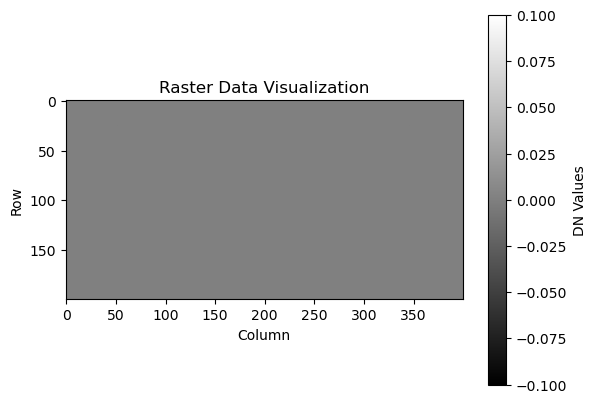

In [100]:
display_image(dataset)

In [19]:
coastal = pd.read_parquet('../../data/PR100/Boundaries/coastal_zone_mgmt_act_boundary.parquet')

In [39]:
hazards = pd.read_parquet('../../data/PR100/Hazards/danger_zones_and_restricted_areas.parquet')

In [63]:
protected_areas = pd.read_parquet('../../data/PR100/Habitat/areas_protegidas_agencia.parquet')

In [95]:
airport_setbacks = pd.read_parquet('../../data/PR100/Infrastructure/setbacks_airport.parquet')

In [26]:
def convert_3D_2D(geometry):
    if geometry.is_empty:
        return geometry
    if isinstance(geometry, Polygon):
        exterior = [xy[:2] for xy in geometry.exterior.coords]
        interiors = [[xy[:2] for xy in interior.coords] for interior in geometry.interiors]
        return Polygon(exterior, interiors)
    elif isinstance(geometry, MultiPolygon):
        polygons = []
        for poly in geometry.geoms:
            polygons.append(convert_3D_2D(poly))
        return MultiPolygon(polygons)
    else:
        raise TypeError(f"Unhandled geometry type: {type(geometry)}")

In [97]:
# Assuming 'coastal' is your DataFrame and 'geometry' is the column with geometries
coastal['geometry_2d'] = coastal['geometry'].apply(lambda x: convert_3D_2D(loads(x)))
hazards['geometry_2d'] = hazards['geometry'].apply(lambda x: convert_3D_2D(loads(x)))
protected_areas['geometry_2d'] = protected_areas['geometry'].apply(lambda x: convert_3D_2D(loads(x)))
#airport_setbacks['geometry_2d'] = airport_setbacks['geometry'].apply(lambda x: convert_3D_2D(loads(x)))

In [102]:
# Now create a GeoDataFrame
coastal_gdf = gpd.GeoDataFrame(coastal, geometry='geometry_2d')
hazards_gdf = gpd.GeoDataFrame(hazards, geometry='geometry_2d')
protected_areas_gdf = gpd.GeoDataFrame(protected_areas, geometry='geometry_2d')

In [106]:
building_setbacks = pd.read_parquet('../../data/PR100/Infrastructure/setbacks_buildings.parquet')

In [103]:
from shapely import wkt

# Convert WKT strings to Shapely geometry objects
airport_setbacks['geometry'] = airport_setbacks['geometry'].apply(wkt.loads)

# Create GeoDataFrame
airport_setbacks_gdf = gpd.GeoDataFrame(airport_setbacks, geometry='geometry')

In [107]:
# Convert WKT strings to Shapely geometry objects
building_setbacks['geometry'] = building_setbacks['geometry'].apply(wkt.loads)

# Create GeoDataFrame
building_setbacks_gdf = gpd.GeoDataFrame(building_setbacks, geometry='geometry')

In [110]:
def find_parquet_files(directory):
    """
    Find all Parquet files within a directory and its subdirectories.

    :param directory: The base directory to search.
    :return: A list of paths to Parquet files.
    """
    parquet_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.parquet'):
                parquet_files.append(os.path.join(root, file))
    return parquet_files

In [151]:
def get_gdf(parquet_file):
    df = pd.read_parquet(parquet_file)
    df['geometry'] = df['geometry'].apply(wkt.loads)
    gdf = gpd.GeoDataFrame(df, geometry='geometry')
    return gdf

In [122]:
parquet_files = find_parquet_files('../../data')

,Site_ID,Site_Name,Gov_Level,State,NS_Full,Prot_Lvl,Mgmt_Plan,Mgmt_Agen,Fish_Rstr,Pri_Con_Fo,...,AreaMar,MarPercent,AreaNT,IUCN,Marine,IUCN_MPA,WDPA_Cd,Shape_Length,Shape_Area,geometry
0,NMF46,Mutton Snapper Spawning Aggregation Area,Federal,National Marine Fisheries Service,Eligible,No Take,Non-MPA Programmatic Fisheries Management Plan,National Marine Fisheries Service,Commercial and Recreational Fishing Restricted,Sustainable Production,...,8.856840,100,8.856840,1a,Marine,1,0.0,12238.098565,8.856841e+06,"MULTIPOLYGON (((365382.445 178198.010, 364498...."
1,NMF48,Red Hind Spawning Aggregation Areas West of Pu...,Federal,National Marine Fisheries Service,Eligible,No Take,Non-MPA Programmatic Fisheries Management Plan,National Marine Fisheries Service,Commercial and Recreational Fishing Restricted,Sustainable Production,...,31.398600,100,31.398600,1a,Marine,1,555547383.0,22608.551948,3.139860e+07,"MULTIPOLYGON (((106171.411 233799.093, 100527...."
2,NMF49,Red Hind Spawning Aggregation Areas West of Pu...,Federal,National Marine Fisheries Service,Eligible,No Take,Non-MPA Programmatic Fisheries Management Plan,National Marine Fisheries Service,Commercial and Recreational Fishing Restricted,Sustainable Production,...,29.451200,100,29.451200,1a,Marine,1,555547384.0,22000.195983,2.945119e+07,"MULTIPOLYGON (((97836.463 225170.913, 92542.91..."
3,NMF50,Red Hind Spawning Aggregation Area East of St....,Federal,National Marine Fisheries Service,Eligible,No Take,Non-MPA Programmatic Fisheries Management Plan,National Marine Fisheries Service,Commercial and Recreational Fishing Restricted,Sustainable Production,...,11.699300,100,11.699300,1a,Marine,1,555547385.0,14918.112645,1.169931e+07,"MULTIPOLYGON (((411869.324 197651.122, 410467...."
4,NMF8,Hind Bank Marine Conservation District,Federal,National Marine Fisheries Service,Eligible,No Take,Non-MPA Programmatic Fisheries Management Plan,National Marine Fisheries Service,Commercial and Recreational Fishing Prohibited,Sustainable Production,...,44.634000,100,44.634000,1a,Marine,1,555547386.0,30071.701848,4.463399e+07,"MULTIPOLYGON (((353389.244 240820.464, 341062...."
5,NMF209,Grammanik Bank,Federal,National Marine Fisheries Service,Eligible,Uniform Multiple Use,Non-MPA Programmatic Fisheries Management Plan,National Marine Fisheries Service,Commercial and Recreational Fishing Restricted,Sustainable Production,...,1.511250,100,0.000000,Unassigned,Marine,0,0.0,6611.470212,1.511250e+06,"MULTIPOLYGON (((355311.372 239937.471, 358096...."
6,PR15,Bosque Estatal de Ceiba Natural Reserve,Territorial,Puerto Rico,Eligible,No Take,MPA Programmatic Management Plan,Puerto Rico Department of Natural and Environm...,Commercial Fishing Restricted,Natural Heritage,...,2.052410,87,2.370020,1a,Mixed,1,888837.0,16702.162999,2.370023e+06,"MULTIPOLYGON (((279925.387 240918.307, 279953...."
7,PR16,Canal Luis Peña Natural Reserve,Territorial,Puerto Rico,Member,No Take,Site-Specific Management Plan,Puerto Rico Department of Natural and Environm...,Commercial and Recreational Fishing Prohibited,Natural Heritage,...,6.240500,98,6.363350,1a,Marine,1,555547387.0,16466.044039,6.363346e+06,"MULTIPOLYGON (((316637.702 253767.810, 316617...."
8,PR24,Laguna Joyuda Natural Reserve,Territorial,Puerto Rico,Eligible,No Take,MPA Programmatic Management Plan,Puerto Rico Department of Natural and Environm...,Commercial Fishing Restricted,Natural Heritage,...,1.705820,95,1.793990,1a,Marine,1,302295.0,7839.281495,1.793991e+06,"MULTIPOLYGON (((121421.867 233829.036, 121425...."
9,PR26,Isla de Desecheo Marine Reserve,Territorial,Puerto Rico,Member,No Take,Site-Specific Management Plan,Puerto Rico Department of Natural and Environm...,Commercial and Recreational Fishing Prohibited,Natural Heritage,...,6.092570,99,6.130000,1a,Marine,1,555512159.0,15131.692467,6.130002e+06,"MULTIPOLYGON (((90273.871 262313.898, 90309.21..."


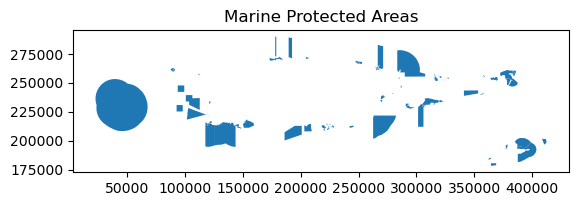

,OBJECTID,SITENAME_L,LIFESTAGE,TYPE,FMC,LTTD_TITLE,LTTD_LINK_,ZONE,INSTATEWAT,ACRES,...,DATACAVEAT,ZoomLevel,CentroidLa,CentroidLo,LTTDT_LINK,Region,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,480,South Shore Industrial Area Patch Reef and Dee...,ALL,HAPC,CFMC,None,None,None,None,0,...,The inland extents of this GIS layer may be su...,0,17.668437,-64.825139,https://www.caribbeanfmc.com/fmp%20sfa/Caribbe...,CFMC,79554.358538,79554.358538,8.737347e+07,"MULTIPOLYGON (((376432.545 186753.998, 376439...."
1,459,Sandy Point National Wildlife Refuge (St. Croix),ALL,HAPC,CFMC,None,None,None,None,0,...,The inland extents of this GIS layer may be su...,0,17.684414,-64.894254,https://www.caribbeanfmc.com/fmp%20sfa/Caribbe...,CFMC,7425.706360,7425.706360,2.264012e+06,"POLYGON ((364095.192 184795.078, 364052.432 18..."
2,467,South Shore Industrial Area,ALL,HAPC,CFMC,None,None,None,None,0,...,The inland extents of this GIS layer may be su...,0,17.691333,-64.778014,https://www.caribbeanfmc.com/fmp%20sfa/Caribbe...,CFMC,58191.634065,58191.634065,1.102518e+07,"MULTIPOLYGON (((374766.245 186245.565, 374755...."
3,458,Frederiksted Reef System (St. Croix),ALL,HAPC,CFMC,None,None,None,None,0,...,The inland extents of this GIS layer may be su...,0,17.723962,-64.888601,https://www.caribbeanfmc.com/fmp%20sfa/Caribbe...,CFMC,9794.768581,9794.768581,1.645766e+06,"MULTIPOLYGON (((363711.930 189807.094, 363713...."
4,452,Great Pond (St. Croix),ALL,HAPC,CFMC,None,None,None,None,0,...,The inland extents of this GIS layer may be su...,0,17.724777,-64.656639,https://www.caribbeanfmc.com/fmp%20sfa/Caribbe...,CFMC,3624.158876,3624.158876,4.451310e+05,"MULTIPOLYGON (((388467.542 189246.388, 388467...."
5,483,St. Croix Coral Reef Area of Particular Concer...,ALL,HAPC,CFMC,None,None,None,None,0,...,The inland extents of this GIS layer may be su...,0,17.758663,-64.622244,https://www.caribbeanfmc.com/fmp%20sfa/Caribbe...,CFMC,137857.581405,137857.581405,1.409091e+08,"MULTIPOLYGON (((388443.079 188556.337, 388485...."
6,453,Altona Lagoon (St. Croix),ALL,HAPC,CFMC,None,None,None,None,0,...,The inland extents of this GIS layer may be su...,0,17.750812,-64.687101,https://www.caribbeanfmc.com/fmp%20sfa/Caribbe...,CFMC,7311.045792,7311.045792,6.924357e+05,"POLYGON ((385629.822 191931.468, 385628.766 19..."
7,450,Green Cay Wildlife Refuge (St. Croix),ALL,HAPC,CFMC,None,None,None,None,0,...,The inland extents of this GIS layer may be su...,0,17.766933,-64.666087,https://www.caribbeanfmc.com/fmp%20sfa/Caribbe...,CFMC,1475.921662,1475.921662,5.032449e+04,"POLYGON ((387546.876 193734.074, 387531.618 19..."
8,460,Cane Bay (St. Croix),ALL,HAPC,CFMC,None,None,None,None,0,...,The inland extents of this GIS layer may be su...,0,17.770157,-64.839353,https://www.caribbeanfmc.com/fmp%20sfa/Caribbe...,CFMC,21440.269698,21440.269698,4.147624e+06,"MULTIPOLYGON (((373024.584 194705.903, 373024...."
9,461,Salt River Bay National Historical Park and Ec...,ALL,HAPC,CFMC,None,None,None,None,0,...,The inland extents of this GIS layer may be su...,0,17.777399,-64.755630,https://www.caribbeanfmc.com/fmp%20sfa/Caribbe...,CFMC,14482.513829,14482.513829,4.236388e+06,"POLYGON ((378844.207 194896.754, 378874.500 19..."


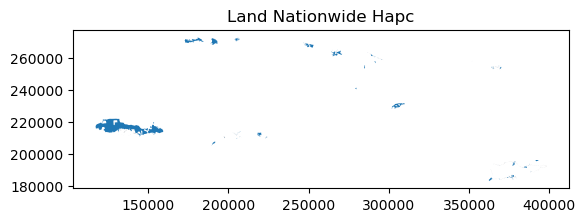

,description,composition,State,reefName,reefID,comments,species,area,date,Depth_ft,Relief_ft,Clearance_ft,geometry
0,"Taino Reefs (concrete coral-like structures), ...","Cement, sand and gravel",Puerto Rico,Ratones,None,These structures were placed close to an islan...,Unknown,Unknown,2001,3.94,1.74,0.23,"POLYGON ((160578.985 231450.727, 160384.118 22..."
1,Bay Ball (Reef ball) 1 module was installed in...,"Cement, sand and gravel",Puerto Rico,El Mario,None,This structure was part of an experiment were ...,Unknown,Unknown,2001,14.76,3.28,11.48,"POLYGON ((174507.794 213299.905, 174312.926 20..."
2,Bay Ball (Reef ball) 45 modules were installed...,"Cement, sand and gravel",Puerto Rico,Jaboncillo,None,These structures were installed as part of a s...,Unknown,Unknown,2005,9.84,3.28,6.56,"POLYGON ((190532.736 213320.656, 190337.869 20..."
3,Bay Ball (Reef ball) 45 modules were installed...,"Cement, sand and gravel",Puerto Rico,Atolladora,None,These structures were installed as part of a s...,Unknown,Unknown,2005,9.84,3.28,6.56,"POLYGON ((195850.090 213645.052, 195655.223 20..."
4,Bay Ball (Reef ball) 10 modules were installed...,"Cement, sand and gravel",Puerto Rico,Tamarindo,None,These structures were installed as part of a s...,Unknown,Unknown,2005,7.87,3.28,4.59,"POLYGON ((196665.131 213269.757, 196470.263 20..."
5,"Taino Reefs (concrete coral-like structures), ...","Cement, sand and gravel",Puerto Rico,Playita Condado,None,These structures were installed as a part of a...,Unknown,Unknown,2012,7.87,3.28,4.59,"POLYGON ((277501.002 269525.281, 277306.135 26..."
6,"Taino Reefs (concrete coral-like structures), ...","Cement, sand and gravel",Puerto Rico,Escambrón,None,These structures were installed as part of a m...,Unknown,Unknown,2010,19.69,3.28,16.4,"POLYGON ((277237.875 270031.390, 277043.008 26..."


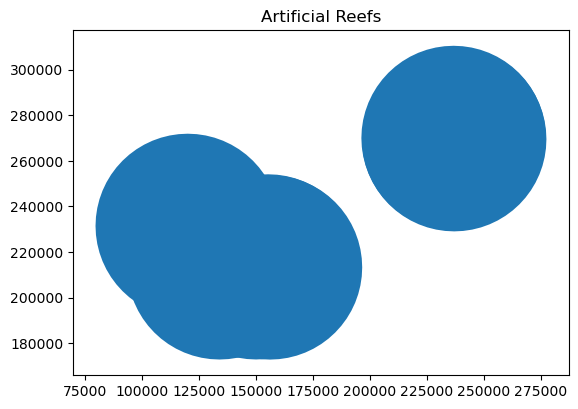

,OBJECTID,SITENAME_L,LIFESTAGE,TYPE,FMC,LTTD_TITLE,LTTD_LINK_,ZONE,INSTATEWAT,ACRES,...,DATACAVEAT,ZoomLevel,CentroidLa,CentroidLo,LTTDT_LINK,Region,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,1,Stetson Bank,ALL,HAPC,GFMC,None,None,None,None,1184,...,This GIS layer accurately reflects the boundar...,0,28.165996,-94.297502,https://gulfcouncil.org/wp-content/uploads/Fin...,GFMC,9924.759800,11141.540500,7.758352e+06,"POLYGON ((-10498556.030 3251174.402, -10495766..."
1,2,29 Fathom,ALL,HAPC,GFMC,None,None,None,None,3629,...,This GIS layer accurately reflects the boundar...,0,28.134013,-93.489148,https://gulfcouncil.org/wp-content/uploads/Fin...,GFMC,15954.871202,17473.932630,1.886053e+07,"POLYGON ((-10409095.966 3248537.098, -10405199..."
2,3,Alderice Bank,ALL,HAPC,GFMC,None,None,None,None,5113,...,This GIS layer accurately reflects the boundar...,0,28.083253,-91.996259,https://gulfcouncil.org/wp-content/uploads/Fin...,GFMC,18644.610102,21334.850000,2.654418e+07,"POLYGON ((-10244711.587 3241285.515, -10237997..."
3,4,McGrail Bank,ALL,HAPC,GFMC,None,None,None,None,11993,...,This GIS layer accurately reflects the boundar...,0,27.967260,-92.596121,https://gulfcouncil.org/wp-content/uploads/Fin...,GFMC,20604.604501,31933.241055,6.211510e+07,"POLYGON ((-10304858.702 3227070.041, -10301301..."
4,5,MacNeil,ALL,HAPC,GFMC,None,None,None,None,6835,...,This GIS layer accurately reflects the boundar...,0,28.014266,-93.504147,https://gulfcouncil.org/wp-content/uploads/Fin...,GFMC,21891.394203,23839.524568,3.544026e+07,"POLYGON ((-10411656.314 3234316.412, -10405979..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,1137,Green Canyon 234,ALL,HAPC,GFMC,Deep-water Coral Areas for HAPC Map,https://gulfcouncil.org/wp-content/uploads/Fin...,None,None,11521,...,This GIS layer accurately reflects the boundar...,0,27.750496,-91.239509,https://gulfcouncil.org/wp-content/uploads/Fin...,GFMC,28969.653995,32710.921374,5.944353e+07,"POLYGON ((-10159384.246 3203153.507, -10153931..."
232,1138,West Florida Wall,ALL,HAPC,GFMC,Southeastern Gulf HAPC Map,https://gulfcouncil.org/wp-content/uploads/Fin...,None,None,30734,...,This GIS layer accurately reflects the boundar...,0,26.317774,-84.756533,https://gulfcouncil.org/wp-content/uploads/Fin...,GFMC,75324.559176,83983.530630,1.546396e+08,"POLYGON ((-9439809.989 3039678.613, -9437580.5..."
233,1139,L & W Pinnacles and Scamp Reef,ALL,HAPC,GFMC,Northeastern Gulf HAPC Map,https://gulfcouncil.org/wp-content/uploads/Fin...,None,None,12121,...,This GIS layer accurately reflects the boundar...,0,29.335053,-87.787804,https://gulfcouncil.org/wp-content/uploads/Fin...,GFMC,37727.966328,43243.351950,6.444133e+07,"POLYGON ((-9775256.255 3394237.265, -9778838.1..."
234,1140,Rough Tongue Reef,ALL,HAPC,GFMC,Northeastern Gulf HAPC Map,https://gulfcouncil.org/wp-content/uploads/Fin...,None,None,11529,...,This GIS layer accurately reflects the boundar...,0,29.438355,-87.575531,https://gulfcouncil.org/wp-content/uploads/Fin...,GFMC,28978.696712,33248.085731,6.141422e+07,"POLYGON ((-9754419.579 3413304.799, -9743334.8..."


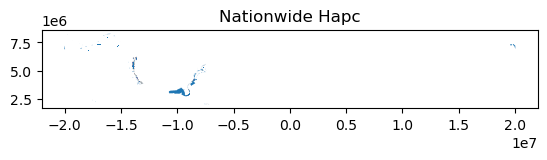

,NAME,MGMT,OWNERSHIP,YEAR_ESTAB,LOC_DESIG,TERR_MAR,HECTARES,ACRES,GIS_SOURCE,NOTES,geometry
0,-,-,-,-,-,Terrestre,8.944272,22.101777,USFWS y Para la Naturaleza,"Overlap area, in revision","POLYGON Z ((129009.305 217938.216 0.000, 12898..."
1,Antiguo Acueducto del rÃ­o Piedras,Para la Naturaleza,Autoridad de Acueductos y Alcantarillados,2006,Area Natural Protegida,Terrestre,3.560945,8.799286,Para La Naturaleza - Noviembre2015,None,"POLYGON Z ((239612.569 261467.233 0.000, 23961..."
2,Ãrea Natural Protegida Bosque de Pterocarpus ...,Para la Naturaleza,Para la Naturaleza,1995,Area Natural Protegida,Terrestre,11.125744,27.492312,Para La Naturaleza - Noviembre2015,None,"POLYGON Z ((215857.217 270004.607 0.000, 21579..."
3,Ãrea Natural Protegida CaÃ±Ã³n Las Bocas,Departamento de Recursos Naturales y Ambiental...,DRNA,2015,Area Natural Protegida,Terrestre,28.959450,71.560360,DRNA - CaÃ±on Las Bocas,None,"MULTIPOLYGON Z (((216692.795 242816.758 0.000,..."
4,Ãrea Natural Protegida Cerro Las Mesas,Para la Naturaleza,Para la Naturaleza,1999,Area Natural Protegida,Terrestre,5.909279,14.602146,Para La Naturaleza - Noviembre2015,None,"POLYGON Z ((128640.415 238760.214 0.000, 12862..."
...,...,...,...,...,...,...,...,...,...,...,...
193,Ãrea Natural Protegida RÃ­o Encantado,Para la Naturaleza,Para la Naturaleza,2000,Area Natural Protegida,Terrestre,875.197215,2162.659417,Para La Naturaleza - Diciembre 2016,Updated boundary in December 2016 version,"MULTIPOLYGON Z (((191354.601 258900.148 0.000,..."
194,Reserva Natural CiÃ©naga Las Cucharillas,Departamento de Recursos Naturales y Ambiental...,terrenos publicos y privados,1976,Reserva Natural,Terrestre,77.322450,191.067935,DRNA ANPs - mayo 2015,None,"MULTIPOLYGON Z (((232029.404 268644.075 0.000,..."
195,Zona Amortiguamiento RN CiÃ©naga Las Cucharillas,Departamento de Recursos Naturales y Ambiental...,terrenos publicos y privados,None,Zona de Amortiguamiento,None,0.000000,0.000000,DRNA ANPs - mayo 2015,Zonas importantes para el manejo de areas prot...,"MULTIPOLYGON Z (((232029.404 268644.075 0.000,..."
196,Reserva Natural Corredor EcolÃ³gico del Noreste,Departamento de Recursos Naturales y Ambiental...,terrenos publicos y privados,2013,Reserva Natural,Terrestre,0.000000,0.000000,DRNA ANPs - mayo 2015,Area de la designacion del corredor que coinci...,"MULTIPOLYGON Z (((283849.640 259758.470 0.000,..."


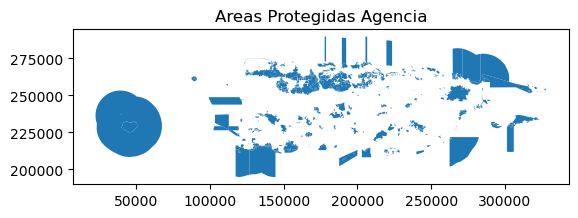

,OBJECTID,scaleBand,description,effectiveDate,Shape_Length,geometry
0,318,approach,submarine cable,2002-06-18T00:00:00,0.646258,"MULTILINESTRING ((363551.652 192938.715, 36355..."
1,319,approach,submarine cable,2002-10-08T00:00:00,0.617258,"MULTILINESTRING ((364012.824 192817.325, 36385..."
2,320,approach,submarine cable,2000-02-05T00:00:00,0.839511,"MULTILINESTRING ((419080.774 204520.437, 41899..."
3,321,approach,submarine cable,2000-04-22T00:00:00,1.100255,"MULTILINESTRING ((320898.507 285050.458, 32630..."
4,322,approach,submarine cable,2000-02-05T00:00:00,0.337281,"MULTILINESTRING ((388212.592 268263.986, 38812..."
...,...,...,...,...,...,...
95,2271,RNC (harbor),submarine cable,2012-12-01T00:00:00,0.030289,"MULTILINESTRING ((356932.935 260738.876, 35645..."
96,2272,RNC (harbor),submarine cable,2012-12-01T00:00:00,0.163229,"MULTILINESTRING ((230315.520 281192.726, 23354..."
97,2273,RNC (general),submarine cable,2012-12-01T00:00:00,0.996288,"MULTILINESTRING ((33894.815 175011.665, 59922...."
98,2274,RNC (general),submarine cable,2012-12-01T00:00:00,1.667358,"MULTILINESTRING ((69699.404 262814.891, 73948...."


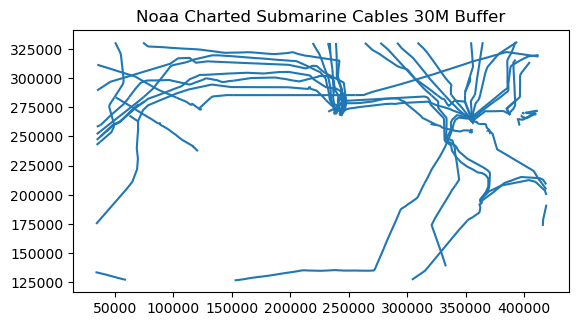

,G3E_FNO,G3E_FID,CD_STATE,TRANS_V_KV,CD_OH_UG,CONDITION,NODE1_ID,NODE2_ID,CD_PHASE,CIRCUIT1,CD_STATUS,CONFIGURAT,OHGW_SZMAT,SIZE_MATER,CONBY_OHGW,COND_BY_PH,geometry
0,41,6669721,In Service,115.0,OH,Normal,1000030072,1000304577,ABC,40200,Closed,Horizontal,None,795 ACSR,0,1,"MULTILINESTRING ((231080.050 214294.978, 23110..."
1,41,6669724,In Service,115.0,OH,Normal,1000030073,1000304576,ABC,40100,Closed,Horizontal,None,795 ACSR,0,1,"MULTILINESTRING ((231091.822 214293.893, 23110..."
2,41,6669727,In Service,115.0,OH,Normal,1000424193,1000304578,ABC,37800,Closed,Horizontal,None,556 ACSR,0,1,"MULTILINESTRING ((231133.040 214294.215, 23114..."
3,41,6669730,In Service,115.0,OH,Normal,6669731,1000304698,ABC,36300,Closed,Horizontal,None,795 ACSR,0,1,"MULTILINESTRING ((231163.828 214236.762, 23115..."
4,41,6669733,In Service,115.0,OH,Normal,6669731,1000030075,ABC,36300,Closed,Horizontal,None,795 ACSR,0,1,"MULTILINESTRING ((231163.828 214236.762, 23114..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8654,41,1001919413,In Service,115.0,OH,Normal,1000442928,1000442929,ABC,39000,Closed,Horizontal,"1/2"" steel",1192 ACSR,1,1,"MULTILINESTRING ((230593.152 255946.624, 23061..."
8655,41,1001919415,In Service,115.0,OH,Normal,1000442929,0,ABC,39000,Closed,Horizontal,"1/2"" steel",1192 ACSR,1,1,"MULTILINESTRING ((230610.778 255977.929, 23064..."
8656,41,1001919416,In Service,115.0,OH,Normal,0,1000442930,ABC,39000,Closed,Horizontal,"1/2"" steel",1192 ACSR,1,1,"MULTILINESTRING ((230659.182 256051.725, 23069..."
8657,41,1001919418,In Service,115.0,OH,Normal,1000442931,0,ABC,39000,Closed,Horizontal,"1/2"" steel",1192 ACSR,1,1,"MULTILINESTRING ((230694.696 256156.552, 23081..."


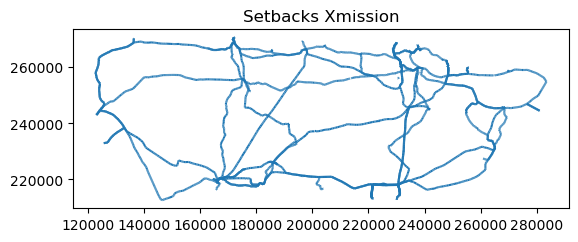

,cableSystem,owner,status,geometry
0,Cable 99,Eversource Energy,Operational,"MULTIPOLYGON (((-70.58239 41.46141, -70.58236 ..."
1,Power Transmission Cable,National Grid and Orsted,Operational,"MULTIPOLYGON (((-71.55122 41.18713, -71.55124 ..."
2,Power Transmission Cable,National Grid and Orsted,Operational,"MULTIPOLYGON (((-71.56624 41.18339, -71.56620 ..."
3,Martha's Vineyard Coastal Observatory,Woods Hole Oceanographic Institution,Operational,"MULTIPOLYGON (((-70.56663 41.32472, -70.56660 ..."
4,Japan-US Seg 9,AT&T,Operational,"MULTIPOLYGON (((-123.74197 38.99260, -123.7420..."
...,...,...,...,...
2620,None,None,None,"MULTIPOLYGON (((-124.11404 46.91448, -124.1146..."
2621,None,None,None,"MULTIPOLYGON (((-124.12839 46.95082, -124.1286..."
2622,None,None,None,"MULTIPOLYGON (((-80.59131 28.52156, -80.59197 ..."
2623,None,None,None,"MULTIPOLYGON (((-80.58831 28.52303, -80.58295 ..."


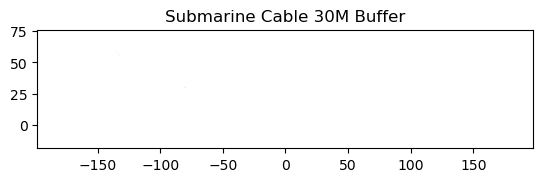

,PRODCT,CATPIP,INFORM,SORIND,DSNM,Area_mi2,Area_km2,Area_nm2,Area_acres,Shape_Length,Shape_Area,geometry
0,N/A,N/A,N/A,"US,US,graph,Chart 11367",US5LA36M.000,0.037101,0.096092,0.028016,23.744930,1337.920445,9.609232e+04,"MULTIPOLYGON (((-10034556.530 3448600.890, -10..."
1,N/A,N/A,N/A,"US,US,graph,Chart 11367",US5LA36M.000,0.040568,0.105071,0.030634,25.963537,2454.305798,1.050707e+05,"MULTIPOLYGON (((-10041947.632 3439584.259, -10..."
2,N/A,N/A,N/A,"US,US,graph,Chart 11367",US5LA36M.000,0.037309,0.096629,0.028172,23.877488,2622.494911,9.662877e+04,"MULTIPOLYGON (((-10027993.856 3470383.763, -10..."
3,N/A,N/A,N/A,"US,US,graph,Chart 11367",US5LA36M.000,0.065377,0.169326,0.049368,41.841458,2243.650822,1.693264e+05,"MULTIPOLYGON (((-10011921.080 3483012.393, -10..."
4,N/A,N/A,N/A,"US,US,graph,Chart 11367",US5LA36M.000,0.054987,0.142416,0.041522,35.191679,1909.856622,1.424157e+05,"MULTIPOLYGON (((-10034141.675 3449265.873, -10..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1508,N/A,N/A,N/A,"US,US,graph,Chart 16663",US4AK15M.000,1.549553,4.013323,1.170098,991.713682,56011.842950,1.694273e+07,"MULTIPOLYGON (((-16870929.581 8569918.744, -16..."
1509,2,supply pipe,N/A,"US,US,graph,reprt,L-402/08 (NWID:15713)",US4AK15M.000,5.772167,14.949844,4.358677,3694.187018,187086.415541,6.262891e+07,"MULTIPOLYGON (((-16890806.122 8550213.917, -16..."
1510,N/A,N/A,N/A,"US,US,graph,Chart 16663",US4AK15M.000,0.668935,1.732533,0.505126,428.118259,25325.700765,7.325882e+06,"MULTIPOLYGON (((-16846108.563 8578659.136, -16..."
1511,N/A,N/A,N/A,"US,US,graph,Chart 16663",US4AK15M.000,2.373316,6.146861,1.792138,1518.922475,84660.004047,2.602373e+07,"MULTIPOLYGON (((-16778642.495 8572515.510, -16..."


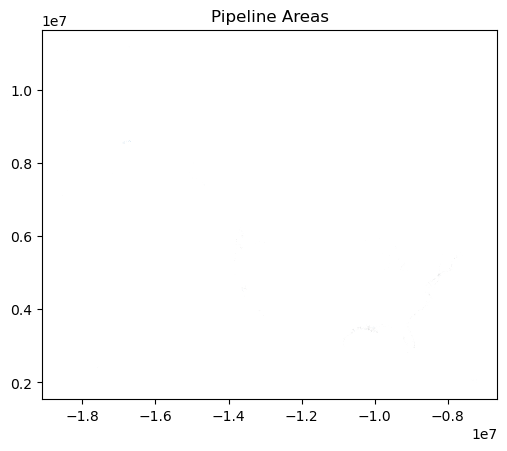

,OBJECTID,geometry
0,1,"LINESTRING (-66.67099 18.48652, -66.67085 18.4..."
1,2,"LINESTRING (-66.69722 18.47796, -66.69720 18.4..."
2,3,"LINESTRING (-66.67999 18.48017, -66.67999 18.4..."
3,4,"LINESTRING (-66.67962 18.48260, -66.67963 18.4..."
4,5,"LINESTRING (-66.70003 18.48076, -66.70000 18.4..."
...,...,...
244629,244630,"LINESTRING (-66.90270 18.15933, -66.90270 18.1..."
244630,244631,"LINESTRING (-66.91360 18.16095, -66.91377 18.1..."
244631,244632,"LINESTRING (-66.90164 18.16307, -66.90172 18.1..."
244632,244633,"LINESTRING (-66.90172 18.16358, -66.90165 18.1..."


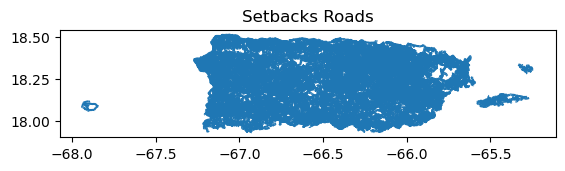

,OBJECTID,permanent_,source_fea,source_dat,source_d_1,source_ori,loaddate,fcode,runway_id,faa_airpor,city,state,ownertype,usestatus,SHAPE_Leng,SHAPE_Area,geometry
0,1,d64dec95-55c0-42a1-87be-8ddb7ded11b1,None,{A9B1E75A-B32C-41D0-8892-C713C566001A},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2020-05-11,20100,06/24,PR10,Cabo Rojo,PR,2,1,0.017349,9.664942e-07,"POLYGON ((-67.14546 18.00897, -67.13762 18.012..."
1,2,{F17162F1-8144-4020-A819-A8C5E825BD5C},None,{A9B1E75A-B32C-41D0-8892-C713C566001A},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2020-05-11,20100,17/35,PR25,Lajas,PR,2,1,0.014539,9.288395e-07,"POLYGON ((-67.06914 18.01026, -67.06973 18.017..."
2,3,15bd2f46-3fad-439b-9b06-8fddcc66badf,None,{A9B1E75A-B32C-41D0-8892-C713C566001A},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2020-05-11,20100,10/28,X63,Humacao,PR,1,1,0.014495,1.182623e-06,"POLYGON ((-65.79717 18.13795, -65.79718 18.137..."
3,4,66d5c72d-7c2f-4dce-8293-e8485a482a38,None,{A9B1E75A-B32C-41D0-8892-C713C566001A},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2020-05-11,20100,12/30,PR20,Adjuntas,PR,2,1,0.009197,4.514965e-07,"POLYGON ((-66.75383 18.17926, -66.75387 18.179..."
4,5,b8b164b9-a379-4d58-9c74-5c11be662fb8,None,{A9B1E75A-B32C-41D0-8892-C713C566001A},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2020-05-11,20100,08/26,SJU,San Juan,PR,1,1,0.060718,1.597664e-05,"POLYGON ((-65.98841 18.44978, -65.98819 18.449..."
5,6,bf0662c3-a0ef-42e8-9b86-0d96817c6c01,None,{A9B1E75A-B32C-41D0-8892-C713C566001A},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2020-05-11,20100,09/27,VQS,Isla De Vieques,PR,1,1,0.025146,2.655084e-06,"POLYGON ((-65.48757 18.13635, -65.48752 18.136..."
6,7,10deaf51-d4ae-49b1-98ea-14de6be2b719,None,{A9B1E75A-B32C-41D0-8892-C713C566001A},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2020-05-11,20100,09/27,SIG,San Juan,PR,1,1,0.032505,4.315106e-06,"POLYGON ((-66.09055 18.45789, -66.09052 18.457..."
7,8,ea020c2d-f78b-49ea-9be8-8558d918c65a,None,{A9B1E75A-B32C-41D0-8892-C713C566001A},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2020-05-11,20100,09/27,MAZ,Mayaguez,PR,1,1,0.029233,3.592392e-06,"POLYGON ((-67.14145 18.25717, -67.15545 18.253..."
8,9,66559210-4817-4f62-8a93-f90dbefa9c7d,None,{A9B1E75A-B32C-41D0-8892-C713C566001A},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2020-05-11,20100,10/28,SJU,San Juan,PR,1,1,0.047057,9.413471e-06,"POLYGON ((-65.99061 18.43371, -65.99061 18.433..."
9,10,89fc0394-7401-4bcf-8017-50cb3f6cf266,None,{A9B1E75A-B32C-41D0-8892-C713C566001A},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2020-05-11,20100,13/31,CPX,Isla De Culebra,PR,1,1,0.015098,1.121010e-06,"POLYGON ((-65.30065 18.31117, -65.30073 18.311..."


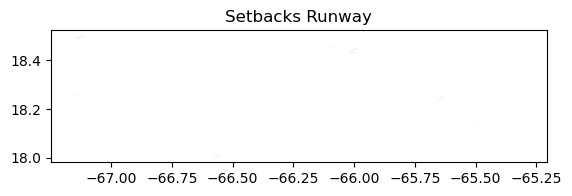

,OBJECTID,permanent_,source_fea,source_dat,source_d_1,source_ori,loaddate,ftype,fcode,faa_airpor,name,gnis_id,ownertype,ownership,geometry
0,1,52ba289f-924a-48b0-bafb-a206b6aa9996,None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,201,20100,SIG,09/27,None,1,1,POINT (-66.09815 18.45683)
1,2,{4CED7A73-E71D-4601-8A55-F2F1D082AFA3},None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,201,20100,PR20,12/30,None,2,1,POINT (-66.75611 18.18012)
2,3,f901ac9d-e14c-45fb-87aa-d72ea7a6c875,None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,201,20100,X63,10/28,None,1,1,POINT (-65.80069 18.13807)
3,4,b10bc687-2d41-4214-a962-030b366431cb,None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,201,20100,SJU,08/26,None,1,1,POINT (-66.00226 18.44388)
4,5,00e49c1f-fff2-4f54-8be7-1fbf931763f6,None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,200,20000,PR10,Boqueron Airport,2443851,2,1,POINT (-67.13690 18.01238)
5,6,0a0d2b05-ed77-4bf3-b0b9-9aa0c47b2175,None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,201,20100,RVR,07/25,None,1,1,POINT (-65.64338 18.24517)
6,7,f9f03611-769c-4477-af43-4cc839cb7766,None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,200,20000,PSE,Mercedita Airport,1613302,1,1,POINT (-66.56247 18.00976)
7,8,5f1f178a-f944-4a43-ac7f-95d51a02f635,None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,200,20000,ABO,Antonio/Nery/Juarbe Pol Airport,1613286,1,1,POINT (-66.67496 18.45006)
8,9,37925659-7a78-4536-97d6-0619aad24143,None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,201,20100,MAZ,09/27,None,1,1,POINT (-67.14818 18.25576)
9,10,7303f447-b086-4afd-aca1-41eb63cda417,None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,200,20000,MAZ,Eugenio Maria de Hostos Airport,1613299,1,1,POINT (-67.14966 18.25430)


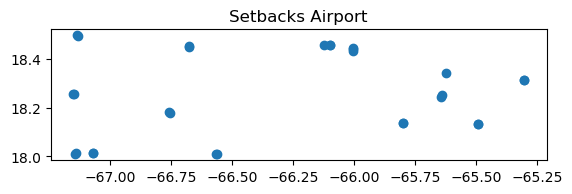

,osm_id,addrcity,office,addrstreet,building,addrhousen,addrfull,name,source,buildingle,buildingma,geometry
0,2.088573e+07,None,None,None,yes,None,None,Multipisos UPRRP,None,None,None,"POLYGON ((-66.04457 18.40265, -66.04374 18.402..."
1,2.088700e+07,None,None,None,university,None,None,Escuela de Arquitecura y Escuela de Bellas Artes,None,None,None,"POLYGON ((-66.04640 18.40216, -66.04640 18.402..."
2,2.088705e+07,None,None,None,university,None,None,Anexo Lic. Eugenio María de Hostos,None,None,None,"POLYGON ((-66.04833 18.40213, -66.04831 18.402..."
3,2.088714e+07,None,None,None,university,None,None,Teatro UPR,None,None,None,"POLYGON ((-66.04906 18.40255, -66.04903 18.402..."
4,2.088761e+07,None,None,None,school,None,None,Complejo Deportivo Cosme Beitía Sálamo,None,None,None,"POLYGON ((-66.04705 18.40773, -66.04624 18.407..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1500606,1.011309e+09,None,None,None,house,None,None,None,None,None,None,"POLYGON ((-65.25742 18.31650, -65.25736 18.316..."
1500607,1.011309e+09,None,None,None,house,None,None,None,None,None,None,"POLYGON ((-65.25734 18.31634, -65.25729 18.316..."
1500608,1.011309e+09,None,None,None,house,None,None,None,None,None,None,"POLYGON ((-65.25721 18.31628, -65.25720 18.316..."
1500609,1.011309e+09,None,None,None,house,None,None,None,None,None,None,"POLYGON ((-65.25738 18.31625, -65.25734 18.316..."


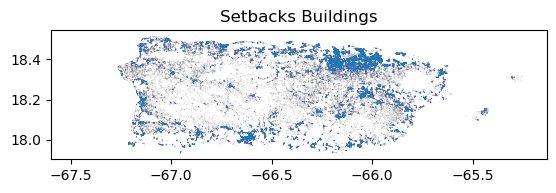

,Jurisdicti,area_mi2,area_km2,area_nm2,Shape_Length,Shape_Area,geometry
0,Puerto Rico,5425.955791,14053.160985,4097.267053,1.784409e+06,1.405316e+10,"MULTIPOLYGON (((64898.796 237128.186, 65056.25..."
1,U.S. Virgin Islands,669.552517,1734.133059,505.594881,6.083448e+05,1.734133e+09,"MULTIPOLYGON (((390910.947 202243.744, 391007...."


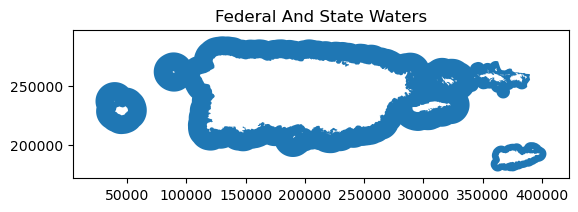

,notes,Shape_Length,Shape_Area,geometry
0,None,13.513394,1.015538,"MULTIPOLYGON Z (((133198.259 291283.164 0.000,..."
1,None,1.262247,0.123939,"MULTIPOLYGON Z (((45026.485 209085.334 0.000, ..."
2,None,1.125087,0.068602,"MULTIPOLYGON Z (((398782.291 197918.042 0.000,..."
3,Applies in Exclusive Economic Zone through fed...,27.722382,16.938586,"MULTIPOLYGON Z (((363130.493 269869.345 0.000,..."


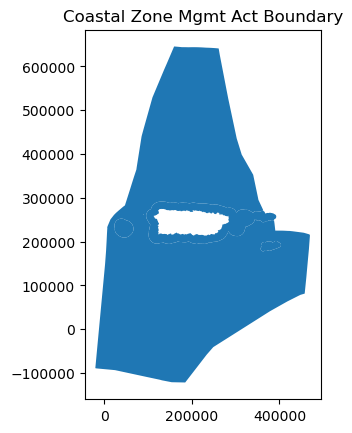

,NAME,MGMT,OWNERSHIP,YEAR_ESTAB,LOC_DESIG,TERR_MAR,HECTARES,ACRES,GIS_SOURCE,NOTES,geometry
0,Ext. Marina del Bosque Estatal de BoquerÃ³n,Departamento de Recursos Naturales y Ambiental...,Dominio publico,1998,ExtensiÃ³n Marina,Marina,17255.697020,42639.755945,DRNA ANPs - mayo 2015,None,"MULTIPOLYGON Z (((122587.952 214501.125 0.000,..."
1,Ext. Marina Reserva Natural La Parguera,Departamento de Recursos Naturales y Ambiental...,Dominio publico,1986,ExtensiÃ³n Marina,Marina,32383.446398,80021.238754,DRNA ANPs - mayo 2015,None,"MULTIPOLYGON Z (((138348.442 215859.717 0.000,..."
2,Forest Legacy Program acquisition - Finca El P...,Departamento de Recursos Naturales y Ambiental...,DRNA,2000,Forest Legacy Program acquisition,Terrestre,0.899423,2.222522,DRNA - Forest Legacy Prog acquisitions til 2009,Areas acquired through the USFS Forest Legacy ...,"POLYGON Z ((153321.513 213461.751 0.000, 15332..."
3,Reserva Natural La Parguera,Departamento de Recursos Naturales y Ambiental...,terrenos publicos y privados,1972,Reserva Natural,Terrestre,94.956767,234.643282,DRNA ANPs - mayo 2015,Parte de la reserva manejada por DRNA,"MULTIPOLYGON Z (((137857.373 215963.247 0.000,..."
4,Zona Amortiguamiento R.N. La Parguera,Departamento de Recursos Naturales y Ambiental...,terrenos publicos y privados,None,Zona de Amortiguamiento,None,0.000000,0.000000,DRNA ANPs - mayo 2015,Zonas importantes para el manejo de areas prot...,"MULTIPOLYGON Z (((138496.890 216094.542 0.000,..."
...,...,...,...,...,...,...,...,...,...,...,...
187,Reserva Natural Hacienda La Esperanza,Para la Naturaleza,Para la Naturaleza,1975,Reserva Natural,Terrestre,921.159875,2276.235622,Para La Naturaleza - Noviembre2015,None,"MULTIPOLYGON Z (((190288.819 272079.918 0.000,..."
188,Ãrea Natural Protegida Bosque de Pterocarpus ...,Para la Naturaleza,Para la Naturaleza,1995,Area Natural Protegida,Terrestre,11.125744,27.492312,Para La Naturaleza - Noviembre2015,None,"POLYGON Z ((215795.908 269999.161 0.000, 21579..."
189,Reserva Natural Pantano de Cibuco,Departamento de Recursos Naturales y Ambiental...,terrenos publicos y privados,1992,Reserva Natural,Terrestre,382.874536,946.103582,DRNA ANPs - mayo 2015,None,"MULTIPOLYGON Z (((205824.417 272023.600 0.000,..."
190,Ext. Marina Reserva Natural Hacienda La Esperanza,Departamento de Recursos Naturales y Ambiental...,Dominio publico,1987,ExtensiÃ³n Marina,Marina,5061.068521,12506.172674,DRNA ANPs - mayo 2015,None,"MULTIPOLYGON Z (((192250.647 271248.585 0.000,..."


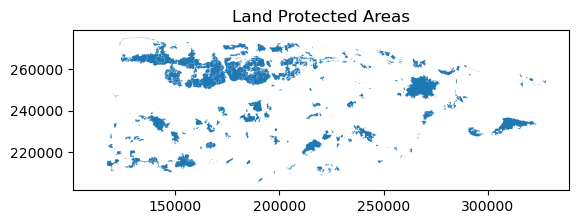

,OBJECTID,geometry
0,1,"POLYGON Z ((-66.81849 18.34699 0.00000, -66.81..."
1,2,"POLYGON Z ((-66.62164 18.02284 0.00000, -66.62..."
2,3,"POLYGON Z ((-67.14266 18.09281 0.00000, -67.14..."
3,4,"POLYGON Z ((-66.74962 17.99523 0.00000, -66.75..."
4,5,"POLYGON Z ((-66.57472 18.36690 0.00000, -66.57..."
...,...,...
4214,346,"POLYGON Z ((-66.01382 17.98414 0.00000, -66.01..."
4215,347,"POLYGON Z ((-66.13818 18.39345 0.00000, -66.13..."
4216,348,"POLYGON Z ((-66.05036 18.18714 0.00000, -66.05..."
4217,349,"POLYGON Z ((-66.05082 18.18912 0.00000, -66.05..."


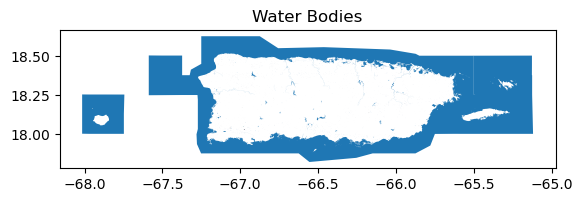

,record,vesselTerms,areaIdentifier,chart,positionQuality,positionSource,depth,soundingType,yearSunk,history,latitudeDD,longitudeDD,geometry
0,15118.0,WRECK,A,12350,Med,Direct,15.0,Feet and tenths,NaN,L-1525(71)--Visible wreck located in approxi...,40.584214,-73.831692,POINT (-73.83169 40.58421)
1,8896.0,UNKNOWN,A,13315,High,Direct,21.0,Feet and tenths,NaN,\r\n HISTORY\r\n H7834/50-- 47-53FT DEPTHS EX...,44.191256,-68.442653,POINT (-68.44265 44.19126)
2,11928.0,UNKNOWN,A,13281,High,Direct,4.0,Meters and tenths,NaN,LNM32/73 (7/11/73)-- MASSACHUSETTS-GLOUCESTE...,42.610194,-70.658381,POINT (-70.65838 42.61019)
3,11932.0,UNKNOWN,A,13281,High,Direct,5.0,Meters and tenths,NaN,LNM29/73 (6/27/73)-- MASSACHUSETTS-GLOUCESTE...,42.614592,-70.654367,POINT (-70.65437 42.61459)
4,10646.0,UNKNOWN,A,13270,High,Direct,33.0,Feet and tenths,NaN,"HISTORY\r\n CL483/00--USACE (BILL KAVANAUGH,...",42.367336,-70.917378,POINT (-70.91738 42.36734)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12655,3408.0,OBSTRUCTION,Z,14974,High,Scaled,0.0,,NaN,"\r\nHISTORY\r\nLS896/01; PIER, SCALED AT ...",46.665869,-90.893650,POINT (-90.89365 46.66587)
12656,3409.0,OBSTRUCTION,Z,14974,High,Scaled,0.0,,NaN,"\r\nHISTORY\r\nLS896/01; RR PIER, SCALED ...",46.666961,-90.897814,POINT (-90.89781 46.66696)
12657,3410.0,OBSTRUCTION,Z,14974,High,Scaled,0.0,,NaN,"HISTORY\r\nLS896/01; RR PIER, SCALED AT 1:1000...",46.666297,-90.900536,POINT (-90.90054 46.66630)
12658,3411.0,OBSTRUCTION,Z,14974,High,Scaled,0.0,,NaN,\r\nHISTORY\r\nLS896/01--LUMBER PIER; SCA...,46.660000,-90.899722,POINT (-90.89972 46.66000)


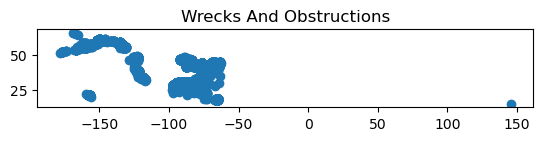

,Name,Depth,USACEdistrict,State,Size,USEPAregion,Source,SourceDate,PrimaryUse,UseStatus,UXOdup,Shape_Length,Shape_Area,geometry
0,Explosives Dumping Area,Unknown,,Puerto Rico,104.60 square nautical miles,2,Chart 25640,2000-04-22T00:00:00+00:00,Explosives Dumping Ground,Unknown,yes,0.664351,2.758495e-02,"MULTIPOLYGON (((264999.511 288720.576, 247479...."
1,San Juan Harbor,200 - 400 meters,South Atlantic - Jacksonville,Puerto Rico,0.98 square nautical miles,2,"Chart 25668, 40 CFR 228.15",2008-10-01T00:00:00+00:00,Dredged Material Disposal,Available,None,0.068744,2.948814e-04,"MULTIPOLYGON (((230914.638 275764.906, 230915...."
2,Arecibo Harbor,101 - 417 meters,South Atlantic - Jacksonville,Puerto Rico,1 square nautical miles,2,"Chart 25668, 40 CFR 228.15",2008-10-01T00:00:00+00:00,Dredged Material Disposal,Available,None,0.068392,2.922161e-04,"MULTIPOLYGON (((170587.952 273589.446, 168744...."
3,Spoil Area,Unknown,,Puerto Rico,0.38 square nautical miles,2,Chart 25670,2011-06-01T00:00:00+00:00,Spoil Ground,Unknown,None,0.040235,1.012661e-04,"MULTIPOLYGON (((231896.879 269388.187, 232580...."
4,Dredged Material Disposal,Unknown,,Puerto Rico,1.09 square nautical miles,2,Chart 25671,2003-03-01T00:00:00+00:00,Dredged Material Disposal,Discontinued,None,0.067984,2.887763e-04,"MULTIPOLYGON (((114885.956 245186.758, 114511...."
5,Mayaguez Harbor,351 - 384 meters,South Atlantic - Jacksonville,Puerto Rico,1 square nautical miles,2,"Chart 25671, 40 CFR 228.15",2003-03-01T00:00:00+00:00,Dredged Material Disposal,Available,None,0.068964,2.969729e-04,"MULTIPOLYGON (((113375.407 246644.896, 113367...."
6,Yabucoa Harbor,549 - 914 meters,South Atlantic - Jacksonville,Puerto Rico,1 square nautical miles,2,"Chart 25650, 40 CFR 228.15",2004-04-01T00:00:00+00:00,Dredged Material Disposal,Available,None,0.069040,2.976602e-04,"MULTIPOLYGON (((278092.032 225251.429, 278115...."
7,Spoil Area,Unknown,,Puerto Rico,0.04 square nautical miles,2,Chart 25679,2003-03-01T00:00:00+00:00,Spoil Ground,Unknown,None,0.021946,9.620483e-06,"MULTIPOLYGON (((149289.743 214504.784, 149293...."
8,Spoil Area,Unknown,,Puerto Rico,0.01 square nautical miles,2,Chart 25679,2003-03-01T00:00:00+00:00,Spoil Ground,Unknown,None,0.007289,1.717483e-06,"MULTIPOLYGON (((147961.062 214355.201, 148091...."
9,Spoil Area,Unknown,,Puerto Rico,0.01 square nautical miles,2,Chart 25679,2003-03-01T00:00:00+00:00,Spoil Ground,Unknown,None,0.008954,2.454857e-06,"MULTIPOLYGON (((149017.363 213914.011, 149358...."


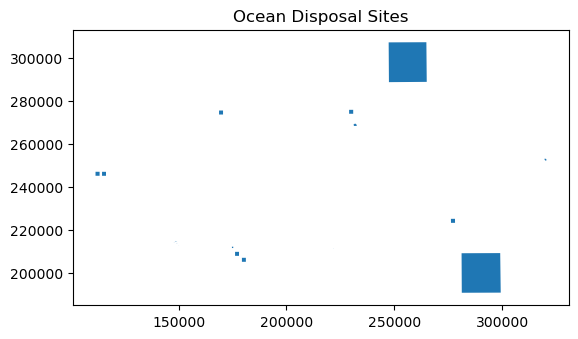

,stormName,stormSegmentYear,stormSegmentMonth,stormSegmentDay,stormSegmentHour,stormSegmentCategory,stormSegmentMaxWindKnots,stormSegmentMaxWindMPH,stormOrderInSeason,stormSerialNumber,oceanBasin,Shape_Length,geometry
0,UNNAMED,1900,8,31,12,Tropical Storm,45,52,1,1900239N15318,North Atlantic,0.905540,"MULTILINESTRING ((384299.754 141841.135, 28855..."
1,UNNAMED,1900,8,31,18,Tropical Storm,45,52,1,1900239N15318,North Atlantic,0.806229,"MULTILINESTRING ((288556.214 152238.962, 20353..."
2,UNNAMED,1900,9,1,0,Tropical Storm,45,52,1,1900239N15318,North Atlantic,1.004987,"MULTILINESTRING ((203539.910 163106.206, 97391..."
3,UNNAMED,1900,9,1,6,Tropical Storm,45,52,1,1900239N15318,North Atlantic,0.905540,"MULTILINESTRING ((97391.422 174445.003, 1974.7..."
4,UNNAMED,1901,7,6,18,Tropical Storm,50,58,3,1901185N10305,North Atlantic,1.442223,"MULTILINESTRING ((342333.975 63999.823, 214168..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,BERTHA,2014,8,2,12,Tropical Storm,40,46,3,2014210N10323,North Atlantic,2.080861,"MULTILINESTRING ((256901.436 74635.211, 76374...."
172,GONZALO,2014,10,14,6,Category 2,90,104,8,2014285N16305,North Atlantic,1.131372,"MULTILINESTRING ((456076.949 341906.300, 37109..."
173,ERIKA,2015,8,27,18,Tropical Storm,45,52,5,2015237N14315,North Atlantic,1.615549,"MULTILINESTRING ((502450.316 65821.531, 341850..."
174,ERIKA,2015,8,28,0,Tropical Storm,45,52,5,2015237N14315,North Atlantic,1.726271,"MULTILINESTRING ((341850.370 130416.721, 16105..."


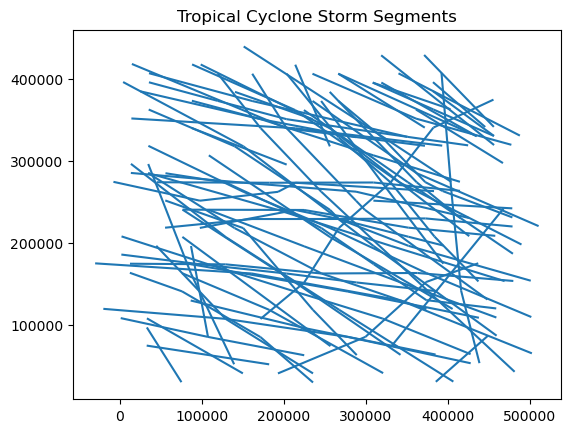

,gridID,protractionNumber,leaseBlock,occurrence34kt,occurrence50kt,occurrence64kt,intersectingStormTracks,occurrence64ktMajorHurricanes,returnInterval34kt,returnInterval50kt,returnInterval64kt,Shape_Length,Shape_Area,grid_id,geometry
0,NE19-03 - 6387,NE19-03,6387,71,28,10,0,6,1.647887,4.178571,11.700000,0.178152,0.001982,19036387,"MULTIPOLYGON (((204447.523 400653.952, 204375...."
1,NE19-03 - 6388,NE19-03,6388,72,28,10,1,6,1.625000,4.178571,11.700000,0.178146,0.001982,19036388,"MULTIPOLYGON (((209245.801 400581.506, 209173...."
2,NE19-03 - 6389,NE19-03,6389,72,28,10,2,6,1.625000,4.178571,11.700000,0.178140,0.001982,19036389,"MULTIPOLYGON (((214043.918 400508.974, 213971...."
3,NE19-03 - 6390,NE19-03,6390,72,28,10,1,6,1.625000,4.178571,11.700000,0.178134,0.001982,19036390,"MULTIPOLYGON (((218841.871 400436.354, 218769...."
4,NE19-03 - 6391,NE19-03,6391,71,29,11,3,6,1.647887,4.034483,10.636364,0.178127,0.001982,19036391,"MULTIPOLYGON (((223639.658 400363.648, 223566...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5959,NE20-10 - 6486,NE20-10,6486,71,28,14,1,6,1.647887,4.178571,8.357143,0.176714,0.001951,20106486,"MULTIPOLYGON (((417729.687 57666.949, 412927.8..."
5960,NE20-10 - 6487,NE20-10,6487,71,28,14,1,6,1.647887,4.178571,8.357143,0.176717,0.001951,20106487,"MULTIPOLYGON (((422531.607 57753.747, 417729.6..."
5961,NE20-10 - 6488,NE20-10,6488,69,27,12,1,5,1.695652,4.333333,9.750000,0.176721,0.001951,20106488,"MULTIPOLYGON (((427333.607 57840.653, 422531.6..."
5962,NE20-10 - 6489,NE20-10,6489,69,28,12,1,5,1.695652,4.178571,9.750000,0.176724,0.001951,20106489,"MULTIPOLYGON (((432135.684 57927.667, 427333.6..."


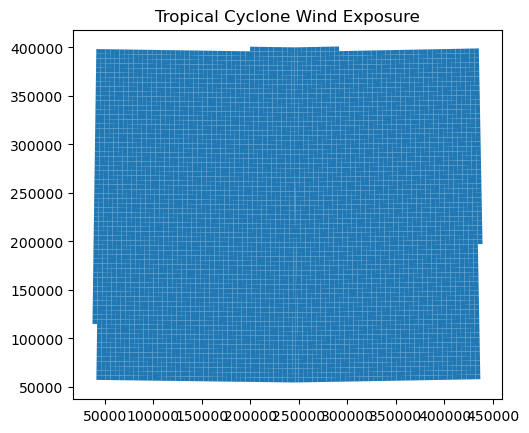

,NAME,PHASE,SITE_ID,DIST,MRA_number,MRS_number,state,Program,Category,Division,SHAPE_Length,SHAPE_Area,geometry
0,ADVANCED BASE DEPOT-RIFLE RANGE,4,01,SPL,J09CA707401R01,J09CA707401,CA,MRS,MMRP,SPD,13080.567971,9.153359e+06,"MULTIPOLYGON (((-13273447.697 4028569.752, -13..."
1,ADVANCED BASE DEPOT-RIFLE RANGE,4,n/a,SPL,J09CA707401R01,n/a,CA,MRA,MMRP,SPD,13077.829492,9.151604e+06,"MULTIPOLYGON (((-13273446.948 4028568.250, -13..."
2,AHUKINI AMMUNITION DUMPING GROUND,4,01,POH,H09HI001001M01,H09HI001001,HI,MRS,MMRP,POD,2315.840081,4.266991e+05,"MULTIPOLYGON (((-17736520.014 2494700.116, -17..."
3,AHUKINI AMMUNITION DUMPING GROUND,4,n/a,POH,H09HI001001M01,n/a,HI,MRA,MMRP,POD,2315.840152,4.266992e+05,"MULTIPOLYGON (((-17736518.418 2494699.710, -17..."
4,Air Force Cache 25,0,n/a,n/a,n/a,n/a,AK,FUDS,Unknown,POD,505.751610,1.598654e+04,"MULTIPOLYGON (((-17037386.408 8335030.576, -17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,US NAV TARGET DEVICE CEN,4,03,NAE,C02NY075803R01,C02NY075803,NY,MRS,MMRP,NAD,1590.649207,1.279396e+05,"MULTIPOLYGON (((-8203243.326 4964059.228, -820..."
571,US NAV TARGET DEVICE CEN,4,n/a,NAE,C02NY075803R01,n/a,NY,MRA,Unknown,NAD,1587.829113,1.272279e+05,"MULTIPOLYGON (((-8203243.175 4964058.012, -820..."
572,USNS TUTUILA,4,01,POH,H09AS000001M01,H09AS000001,AS,MRS,MMRP,POD,262.677046,4.312452e+03,"MULTIPOLYGON (((-19000246.389 -1595217.286, -1..."
573,USNS TUTUILA,4,n/a,POH,H09AS000001M01,n/a,AS,MRA,Unknown,POD,262.677046,4.312452e+03,"MULTIPOLYGON (((-19000244.434 -1595218.142, -1..."


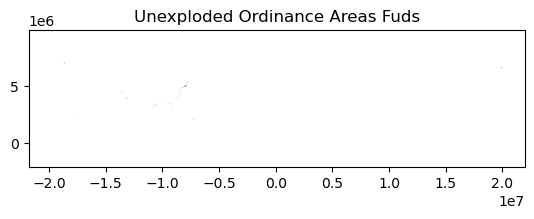

,effectiveDate,boundaryIdentifier,boundaryName,boundaryType,boundaryDescription,instanceCode,boundarySource,boundarySourceURL,agencyOfUse,contact,nativeDatum,state,Shape_Length,Shape_Area,geometry
0,2012-07-01T00:00:00+00:00,334.1490(a)(1),"Caribbean Sea, at St. Croix, Virgin Islands; r...",Restricted Area,Area ‘‘A’’. A triangular area bounded by the f...,"34 FR 19030, Nov. 29, 1969. Redesignated at 50...",U.S. Code of Federal Regulations,http://www.gpo.gov/fdsys/pkg/CFR-2012-title33-...,U.S. Navy,"Commanding Officer, Atlantic Fleet Range Suppo...",NAD83,PR,0.066633,0.000177,"MULTIPOLYGON (((363508.891 190239.786, 362161...."
1,2012-07-01T00:00:00+00:00,334.1490(a)(2),"Caribbean Sea, at St. Croix, Virgin Islands; r...",Restricted Area,Area ‘‘B’’. A rectangular area bounded by the ...,"34 FR 19030, Nov. 29, 1969. Redesignated at 50...",U.S. Code of Federal Regulations,http://www.gpo.gov/fdsys/pkg/CFR-2012-title33-...,U.S. Navy,"Commanding Officer, Atlantic Fleet Range Suppo...",NAD83,PR,0.023333,0.000033,"MULTIPOLYGON (((362189.454 184410.107, 362183...."
2,2017-07-01T00:00:00+00:00,334.1450(a)(1),Atlantic Ocean off north coast of Puerto Rico;...,Danger Zone,Westerly small-arms range. The waters within t...,"14 FR 4552, July 21, 1949. Redesignated at 14 ...",U.S. Code of Federal Regulations,http://www.gpo.gov/fdsys/pkg/CFR-2017-title33-...,U.S. Army,"Commanding General, U.S. Army Forces Antilles",NAD83,PR,0.203173,0.002188,"MULTIPOLYGON (((199033.039 271302.227, 198955...."
3,2017-01-01T00:00:00+00:00,334.1450(a)(3),Atlantic Ocean off north coast of Puerto Rico;...,Danger Zone,Easterly small-arms range. The waters within t...,"14 FR 4552, July 21, 1949. Redesignated at 14 ...",Raster Navigational Charts,http://seamlessrnc.nauticalcharts.noaa.gov/Arc...,U.S. Army,"Commanding General, U.S. Army Forces Antilles",NAD83,PR,0.161984,0.000875,"MULTIPOLYGON (((205588.299 273714.423, 203952...."
4,2012-07-01T00:00:00+00:00,334.1480(a)(2),"Vieques Passage and Atlantic Ocean, off east c...",Restricted Area,"A strip, 1,500 yards wide, off the naval reser...","13 FR 9564, Dec. 31, 1948. Redesignated at 50 ...",U.S. Code of Federal Regulations,http://www.gpo.gov/fdsys/pkg/CFR-2012-title33-...,U.S. Navy,Department of the Navy,NAD83,PR,0.561088,0.002999,"MULTIPOLYGON (((298586.420 235588.655, 298621...."
5,2012-07-01T00:00:00+00:00,334.1480(a)(3),"Vieques Passage and Atlantic Ocean, off east c...",Restricted Area,"A strip, 1,500 yards wide, off the south coast...","13 FR 9564, Dec. 31, 1948. Redesignated at 50 ...",U.S. Code of Federal Regulations,http://www.gpo.gov/fdsys/pkg/CFR-2012-title33-...,U.S. Navy,Department of the Navy,NAD83,PR,0.339809,0.001266,"MULTIPOLYGON (((308520.232 231265.509, 308555...."
6,2012-07-01T00:00:00+00:00,334.1460(a),"Atlantic Ocean and Vieques Sound, in vicinity ...",Danger Zone,From Punta Resaca on the north coast of Culebr...,"13 FR 9530, Dec. 31, 1948. Redesignated at 14 ...",U.S. Code of Federal Regulations,http://www.gpo.gov/fdsys/pkg/CFR-2012-title33-...,U.S. Navy,"Commander, Caribbean Sea Frontier, San Juan, P...",NAD83,PR,0.870485,0.017841,"MULTIPOLYGON (((330141.458 264996.752, 320770...."
7,2012-07-01T00:00:00+00:00,334.1470(a),"Caribbean Sea and Vieques Sound, in vicinity o...",Danger Zone,From Punta Conejo on the south coast of Vieque...,"39 FR 27133, July 25, 1974, as amended at 46 F...",U.S. Code of Federal Regulations,http://www.gpo.gov/fdsys/pkg/CFR-2012-title33-...,U.S. Navy,"Commander, U.S. Naval Forces Caribbean, U.S. N...",NAD83,PR,0.896455,0.015127,"MULTIPOLYGON (((326108.181 239851.236, 324445...."
8,2017-07-01T00:00:00+00:00,334.1450(a)(2),Atlantic Ocean off north coast of Puerto Rico;...,Danger Zone,Camp Tortuguero artillery range. The waters wi...,"14 FR 4552, July 21, 1949. Redesignated at 14 ...",U.S. Code of Federal Regulations,http://www.gpo.gov/fdsys/pkg/CFR-2017-title33-...,U.S. Army,"Commanding General, U.S. Army Forces Antilles",NAD83,PR,0.604254,0.022698,"MULTIPOLYGON (((207272.05

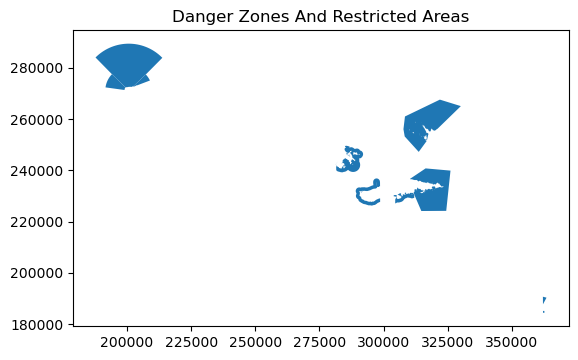

,description,sourceDate,rasterNauticalChart,state,Shape_Length,Shape_Area,geometry
0,Explosives Dumping Area,2006-07-01T00:00:00+00:00,Chart 16013,AK,1.000091,0.055588,"MULTIPOLYGON (((-144.50020 58.99777, -144.8347..."
1,Explosives Dumping Area,2005-01-01T00:00:00+00:00,Chart 16580,AK,0.921605,0.049164,"MULTIPOLYGON (((-152.00685 56.25391, -152.0067..."
2,Explosives Dumping Area Disused,2007-03-01T00:00:00+00:00,Chart 17400,AK,0.909971,0.048181,"MULTIPOLYGON (((-134.50594 54.83134, -134.6277..."
3,Explosives Dumping Area,2007-03-01T00:00:00+00:00,Chart 17400,AK,0.899915,0.046781,"MULTIPOLYGON (((-134.62779 54.83132, -134.5059..."
4,Unexploded Ordnance,2013-07-15T00:00:00+00:00,Chart 16520,AK,4.332140,0.131288,"MULTIPOLYGON (((-166.05201 54.06721, -166.0543..."
...,...,...,...,...,...,...,...
124,Unexploded Ordnance,2003-01-01T00:00:00+00:00,Chart 13006,MA,1.602272,0.141635,"MULTIPOLYGON (((-68.82260 42.86160, -68.82192 ..."
125,Unexploded Ordnance,1965-01-01T00:00:00+00:00,Chart 11388,FL,0.057869,0.000264,"MULTIPOLYGON (((-86.66574 30.36921, -86.66723 ..."
126,Danger Unexploded Bombs,2001-05-12T00:00:00+00:00,chart 16423,AK,0.012725,0.000008,"MULTIPOLYGON (((174.15784 52.70932, 174.15731 ..."
127,Unexploded Ordnance,1971-01-01T00:00:00+00:00,Chart 11442,FL,0.108470,0.000932,"MULTIPOLYGON (((-81.39819 24.41368, -81.39944 ..."


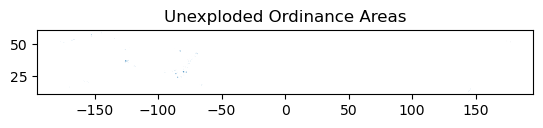

In [123]:
for pf in parquet_files:
    gdf = get_gdf(pf)
    gdf.plot()
    plt.title(pf.split('/')[-1].split('.')[0].replace('_',' ').title())
    plt.show()

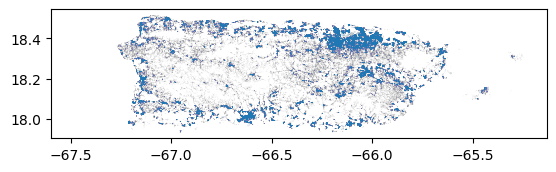

In [108]:
building_setbacks_gdf.plot()
plt.show()

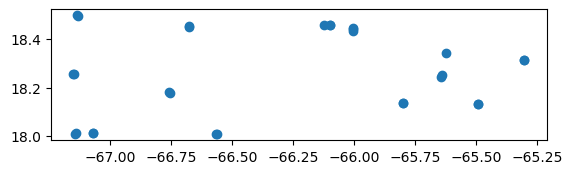

In [104]:
airport_setbacks_gdf.plot()
plt.show()

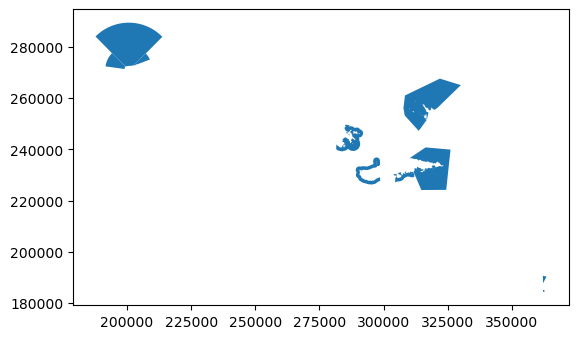

In [105]:
hazards_gdf.plot()
plt.show()

In [50]:
def create_grid(x_start, x_end, y_start, y_end, square_size):
    grid = []
    for x in np.arange(x_start, x_end, square_size):
        for y in np.arange(y_start, y_end, square_size):
            # Define the square's coordinates
            square = Polygon([(x, y), (x + square_size, y), (x + square_size, y + square_size), (x, y + square_size)])
            grid.append(square)
    return gpd.GeoDataFrame({'geometry': grid}, crs="EPSG:32161")

# Create the grid
grid_gdf = create_grid(100000, 300000, 200000, 300000, 500)

In [67]:
def rasterize_polygons(grid, polygons):
    centroids = grid.geometry.centroid
    grid['in_polygon'] = centroids.apply(lambda x: polygons.contains(x).any())

In [68]:
# def rasterize_polygons(grid, polygons):
#     grid['in_polygon'] = grid.geometry.apply(lambda x: polygons.contains(x).any())

In [69]:
rasterize_polygons(grid_gdf, coastal_gdf)

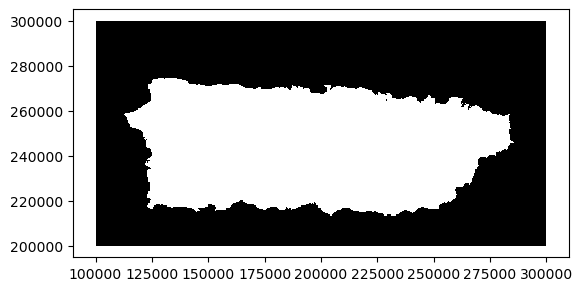

In [70]:
grid_gdf.plot(column='in_polygon', cmap='binary')
plt.show()

In [71]:
rasterize_polygons(grid_gdf, hazards_gdf)

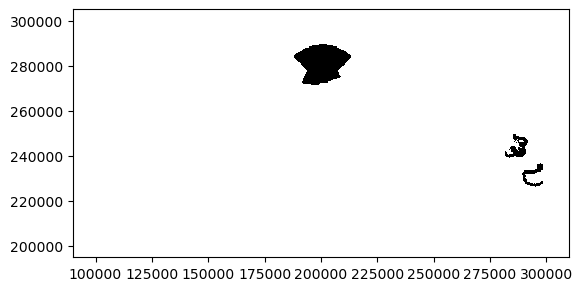

In [72]:
grid_gdf.plot(column='in_polygon', cmap='binary')
plt.show()

In [73]:
rasterize_polygons(grid_gdf, protected_areas_gdf)

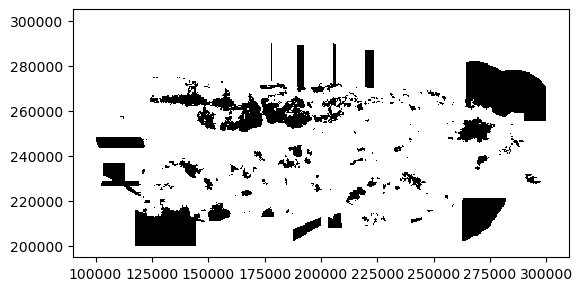

In [74]:
grid_gdf.plot(column='in_polygon', cmap='binary')
plt.show()

# Add binary masks for all PR100 files

In [75]:
grid_gdf = create_grid(100000, 300000, 200000, 300000, 500)

In [81]:
def process_parquet(file_path, grid, base_path):
    # Load the parquet file
    df = pd.read_parquet(file_path)
    
    # Convert geometry data from WKT to shapely objects
    df['geometry'] = df['geometry'].apply(wkt.loads)
    
    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:32161")

    # Rasterize
    rasterize_polygons(grid, gdf)

    # Create an identifier from the file path
    file_identifier = os.path.relpath(file_path, base_path).replace(os.sep, "_")

    # Add the results to the grid
    grid[file_identifier] = grid['in_polygon']
    del grid['in_polygon']


In [78]:
def process_all_parquets(directory, grid):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.parquet'):
                print(f'Processing file: {file}')
                file_path = os.path.join(root, file)
                process_parquet(file_path, grid, directory)

In [83]:
base_directory = '../../data/'
process_all_parquets(base_directory, grid_gdf)

Processing file: marine_protected_areas.parquet
Processing file: land_nationwide_hapc.parquet
Processing file: artificial_reefs.parquet
Processing file: nationwide_hapc.parquet
Processing file: areas_protegidas_agencia.parquet
Processing file: noaa_charted_submarine_cables_30m_buffer.parquet
Processing file: setbacks_xmission.parquet
Processing file: submarine_cable_30m_buffer.parquet
Processing file: pipeline_areas.parquet
Processing file: setbacks_roads.parquet
Processing file: setbacks_runway.parquet
Processing file: setbacks_airport.parquet
Processing file: setbacks_buildings.parquet
Processing file: federal_and_state_waters.parquet
Processing file: coastal_zone_mgmt_act_boundary.parquet
Processing file: land_protected_areas.parquet
Processing file: water_bodies.parquet
Processing file: wrecks_and_obstructions.parquet
Processing file: ocean_disposal_sites.parquet
Processing file: tropical_cyclone_storm_segments.parquet
Processing file: tropical_cyclone_wind_exposure.parquet
Process

In [84]:
grid_gdf.to_csv('grid_results.csv')

In [85]:
grid_gdf.to_parquet('grid_results.parquet')

In [87]:
grid_gdf.T

,0,1,2,3,4,5,6,7,8,9,...,79990,79991,79992,79993,79994,79995,79996,79997,79998,79999
geometry,"POLYGON ((100000 200000, 100500 200000, 100500...","POLYGON ((100000 200500, 100500 200500, 100500...","POLYGON ((100000 201000, 100500 201000, 100500...","POLYGON ((100000 201500, 100500 201500, 100500...","POLYGON ((100000 202000, 100500 202000, 100500...","POLYGON ((100000 202500, 100500 202500, 100500...","POLYGON ((100000 203000, 100500 203000, 100500...","POLYGON ((100000 203500, 100500 203500, 100500...","POLYGON ((100000 204000, 100500 204000, 100500...","POLYGON ((100000 204500, 100500 204500, 100500...",...,"POLYGON ((299500 295000, 300000 295000, 300000...","POLYGON ((299500 295500, 300000 295500, 300000...","POLYGON ((299500 296000, 300000 296000, 300000...","POLYGON ((299500 296500, 300000 296500, 300000...","POLYGON ((299500 297000, 300000 297000, 300000...","POLYGON ((299500 297500, 300000 297500, 300000...","POLYGON ((299500 298000, 300000 298000, 300000...","POLYGON ((299500 298500, 300000 298500, 300000...","POLYGON ((299500 299000, 300000 299000, 300000...","POLYGON ((299500 299500, 300000 299500, 300000..."
PR100_Habitat_marine_protected_areas.parquet,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PR100_Habitat_land_nationwide_hapc.parquet,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PR100_Habitat_artificial_reefs.parquet,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
PR100_Habitat_nationwide_hapc.parquet,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PR100_Habitat_areas_protegidas_agencia.parquet,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PR100_Infrastructure_noaa_charted_submarine_cables_30m_buffer.parquet,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PR100_Infrastructure_setbacks_xmission.parquet,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PR100_Infrastructure_submarine_cable_30m_buffer.parquet,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PR100_Infrastructure_pipeline_areas.parquet,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [88]:
grid_gdf['aggregate'] = grid_gdf.iloc[:, 1:].any(axis=1)

In [101]:
grid_gdf['aggregate']

0        True
1        True
2        True
3        True
4        True
         ... 
79995    True
79996    True
79997    True
79998    True
79999    True
Name: aggregate, Length: 80000, dtype: bool

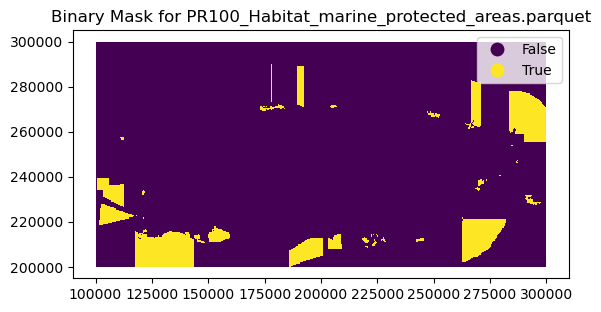

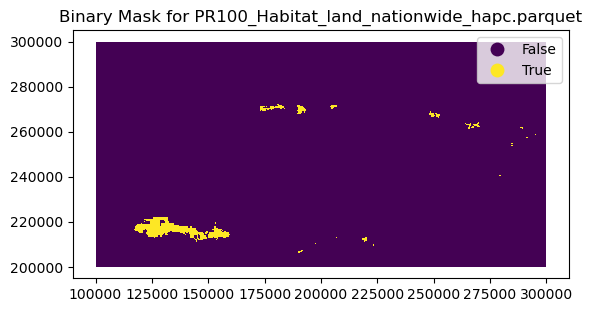

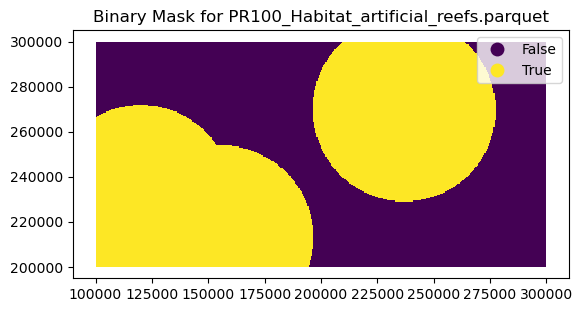

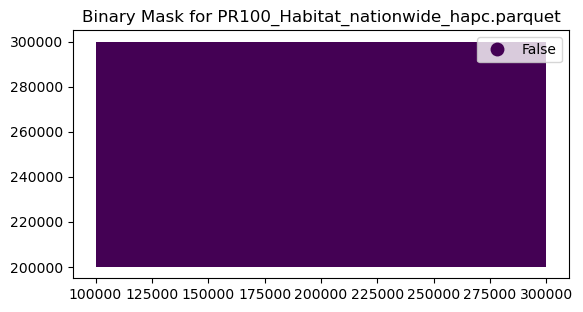

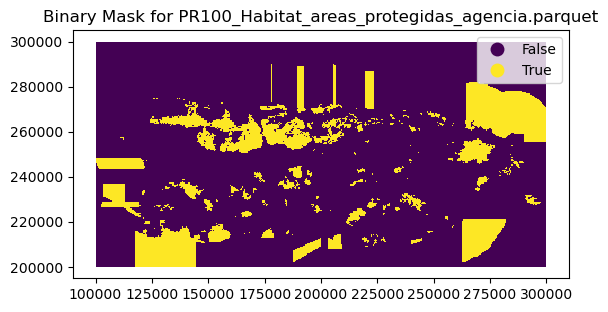

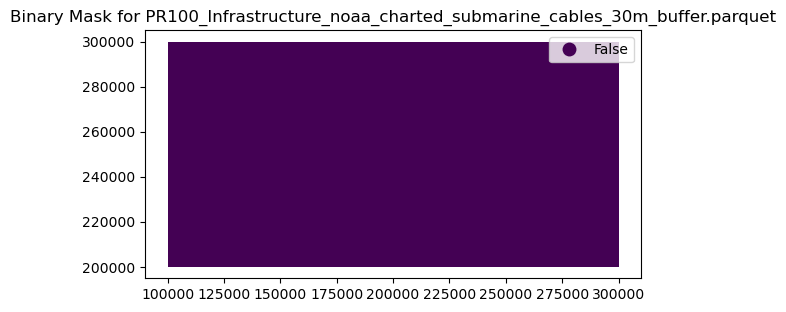

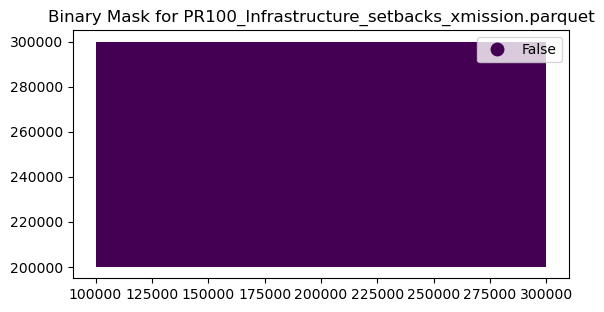

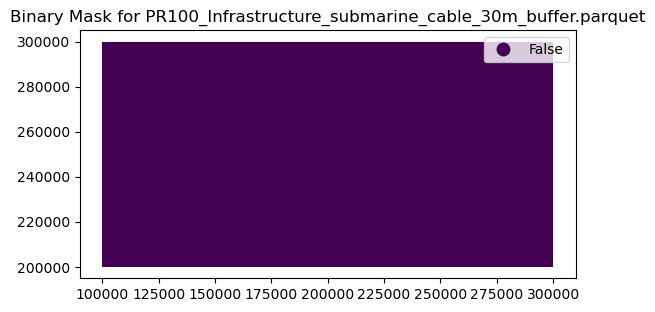

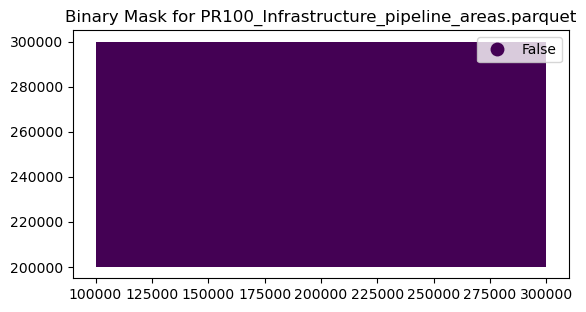

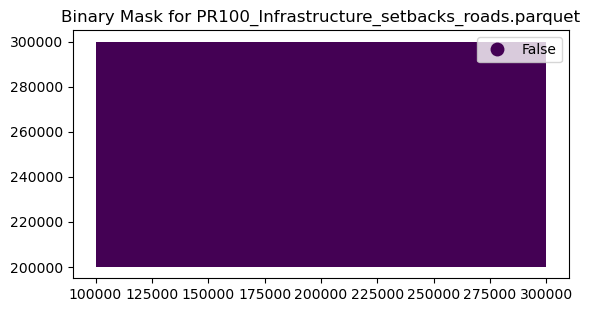

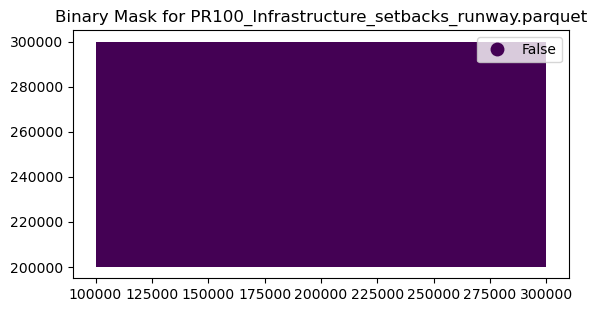

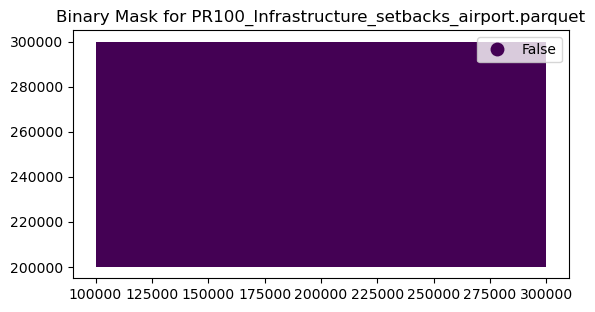

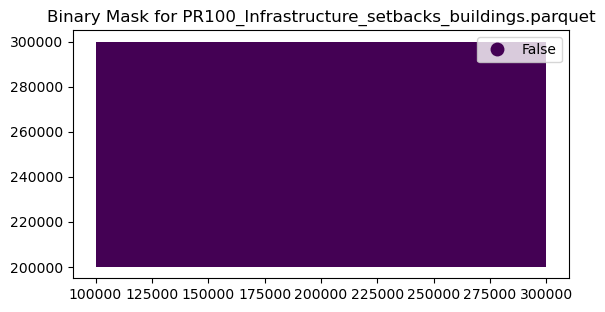

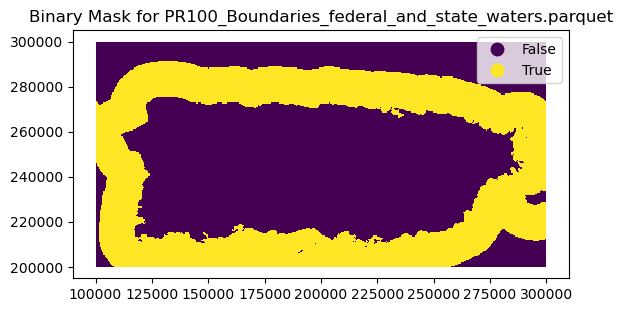

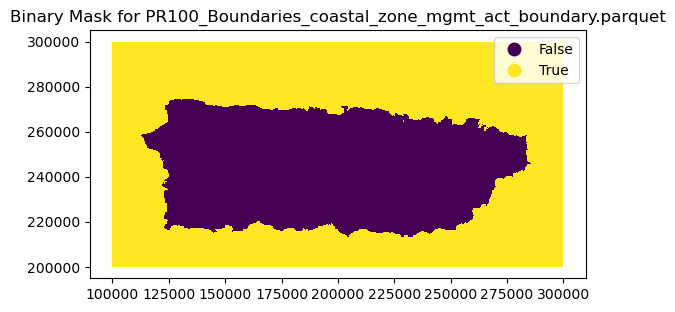

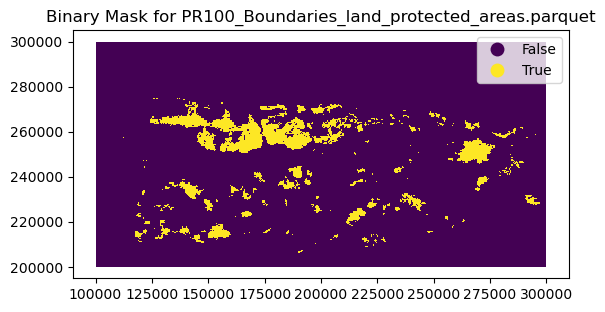

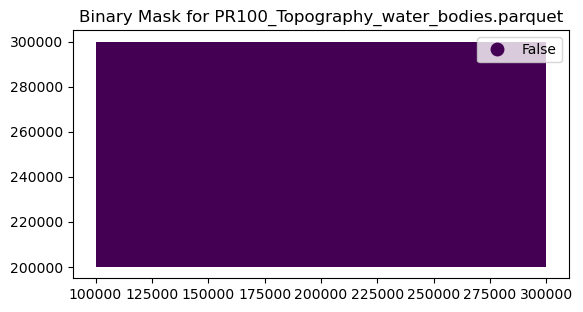

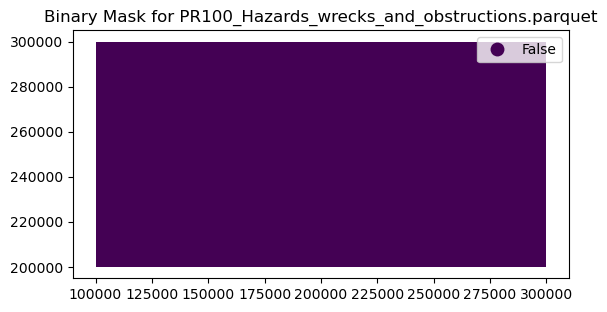

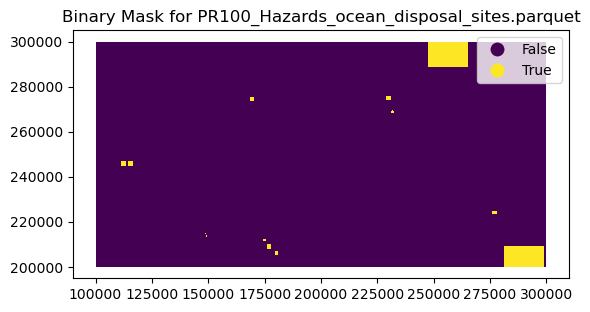

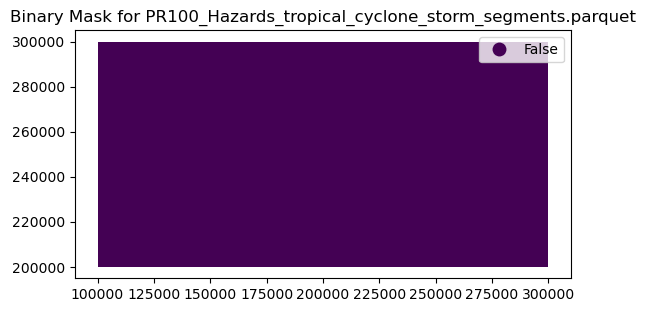

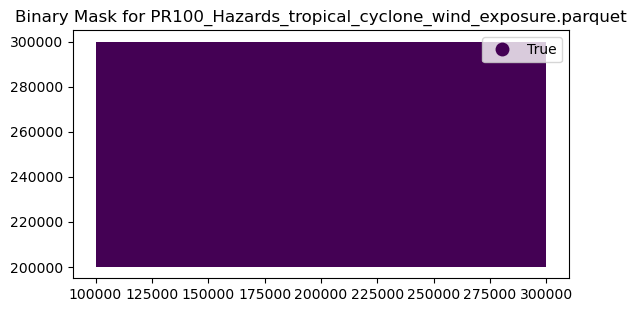

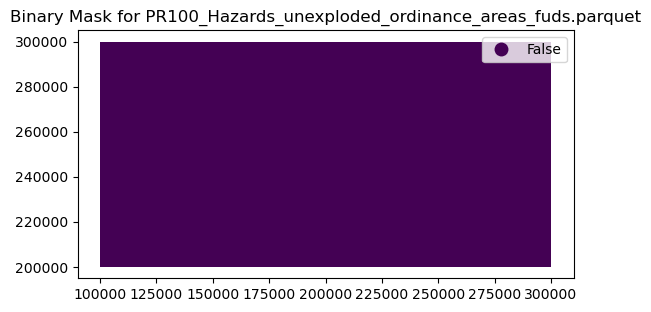

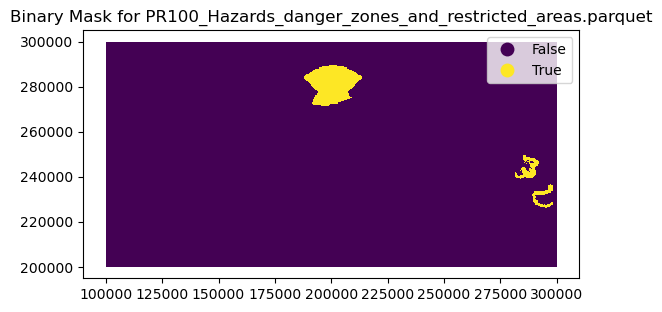

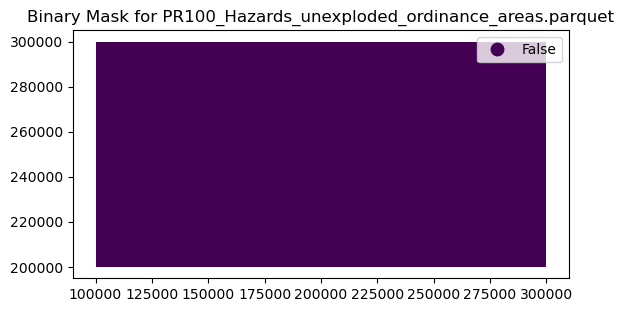

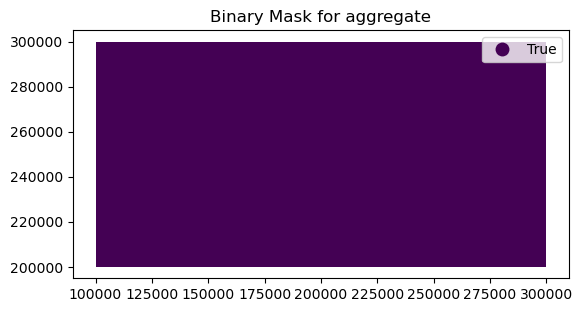

In [93]:
for column in grid_gdf.columns:
    if column == 'geometry':
        continue
    fig, ax = plt.subplots(1, 1)
    grid_gdf.plot(column=column, ax=ax, legend=True, cmap='viridis')
    plt.title(f'Binary Mask for {column}')
    plt.show()

In [179]:
def get_count_in_grid_cell(filepath, crs):
    gdf = get_gdf(filepath)
    gdf.set_crs(crs, inplace=True)
    if crs != grid_gdf.crs:
        gdf = gdf.to_crs(grid_gdf.crs)
    joined_gdf = gpd.sjoin(grid_gdf, gdf[['geometry']], how='left', op='intersects')
    count = joined_gdf.groupby('index').size()
    return count

In [180]:
buildings = ('../../data/PR100/Infrastructure/setbacks_buildings.parquet', 'EPSG:4326')
xmission = ('../../data/PR100/Infrastructure/setbacks_xmission.parquet', grid_gdf.crs)

In [181]:
building_count = get_count_in_grid_cell(buildings)

/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [182]:
grid_gdf['building_density'] = building_count.reindex(grid_gdf.index, fill_value=0)

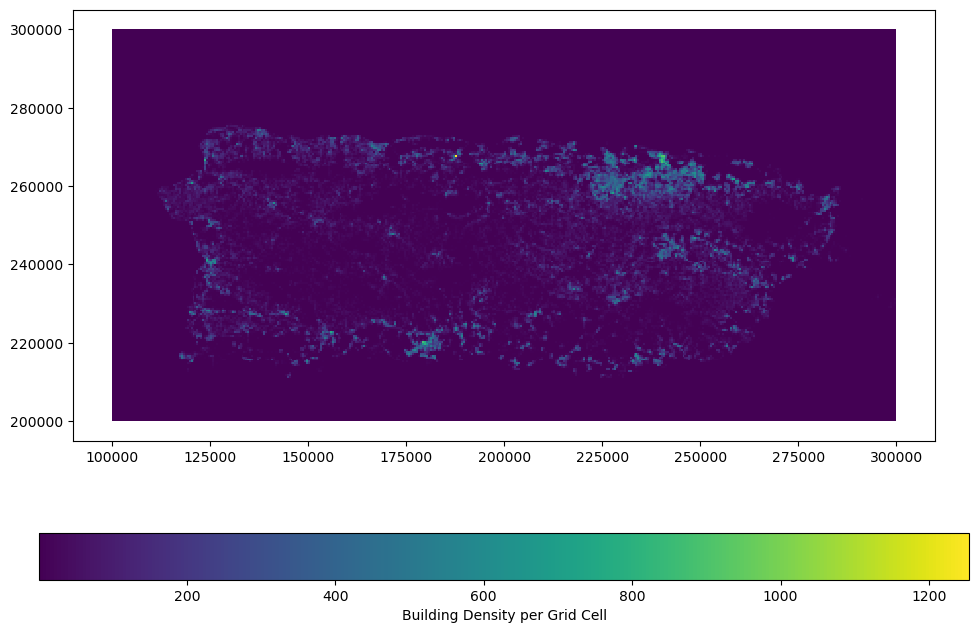

In [183]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
grid_gdf.plot(column='building_density', ax=ax, legend=True,
              legend_kwds={'label': "Building Density per Grid Cell",
                           'orientation': "horizontal"})
plt.show()

/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


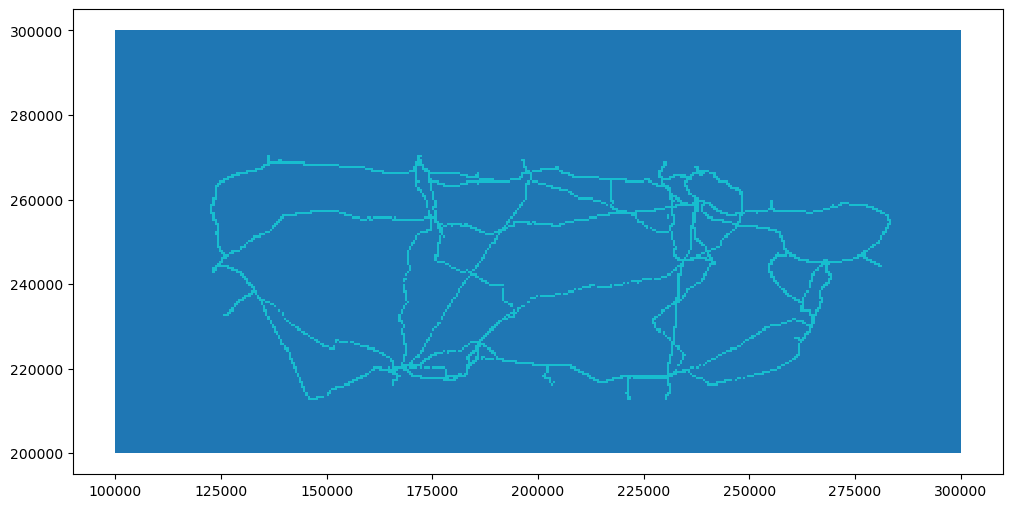

In [184]:
xmission_count = get_count_in_grid_cell(xmission)
grid_gdf['intersects_transmission_line'] = xmission_count > 1
grid_gdf['intersects_transmission_line'].fillna(False, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
grid_gdf.plot(column='intersects_transmission_line', ax=ax)
plt.show()

In [190]:
filepaths = find_parquet_files('../../data')

In [191]:
filepaths

['../../data/PR100/Habitat/marine_protected_areas.parquet',
 '../../data/PR100/Habitat/land_nationwide_hapc.parquet',
 '../../data/PR100/Habitat/artificial_reefs.parquet',
 '../../data/PR100/Habitat/nationwide_hapc.parquet',
 '../../data/PR100/Habitat/areas_protegidas_agencia.parquet',
 '../../data/PR100/Infrastructure/noaa_charted_submarine_cables_30m_buffer.parquet',
 '../../data/PR100/Infrastructure/setbacks_xmission.parquet',
 '../../data/PR100/Infrastructure/submarine_cable_30m_buffer.parquet',
 '../../data/PR100/Infrastructure/pipeline_areas.parquet',
 '../../data/PR100/Infrastructure/setbacks_roads.parquet',
 '../../data/PR100/Infrastructure/setbacks_runway.parquet',
 '../../data/PR100/Infrastructure/setbacks_airport.parquet',
 '../../data/PR100/Infrastructure/setbacks_buildings.parquet',
 '../../data/PR100/Boundaries/federal_and_state_waters.parquet',
 '../../data/PR100/Boundaries/coastal_zone_mgmt_act_boundary.parquet',
 '../../data/PR100/Boundaries/land_protected_areas.parque

In [192]:
crs = []
for fp in filepaths:
    print(fp)
    crs.append(input('CRS: '))

../../data/PR100/Habitat/marine_protected_areas.parquet


CRS:  0


../../data/PR100/Habitat/land_nationwide_hapc.parquet


CRS:  0


../../data/PR100/Habitat/artificial_reefs.parquet


CRS:  0


../../data/PR100/Habitat/nationwide_hapc.parquet


CRS:  0


../../data/PR100/Habitat/areas_protegidas_agencia.parquet


CRS:  0


../../data/PR100/Infrastructure/noaa_charted_submarine_cables_30m_buffer.parquet


CRS:  0


../../data/PR100/Infrastructure/setbacks_xmission.parquet


CRS:  0


../../data/PR100/Infrastructure/submarine_cable_30m_buffer.parquet


CRS:  0


../../data/PR100/Infrastructure/pipeline_areas.parquet


CRS:  0


../../data/PR100/Infrastructure/setbacks_roads.parquet


CRS:  'EPSG:4326'


../../data/PR100/Infrastructure/setbacks_runway.parquet


CRS:  'EPSG:4326'


../../data/PR100/Infrastructure/setbacks_airport.parquet


CRS:  'EPSG:4326'


../../data/PR100/Infrastructure/setbacks_buildings.parquet


CRS:  'EPSG:4326'


../../data/PR100/Boundaries/federal_and_state_waters.parquet


CRS:  0


../../data/PR100/Boundaries/coastal_zone_mgmt_act_boundary.parquet


CRS:  0


../../data/PR100/Boundaries/land_protected_areas.parquet


CRS:  0


../../data/PR100/Topography/water_bodies.parquet


CRS:  'EPSG:4326'


../../data/PR100/Hazards/wrecks_and_obstructions.parquet


CRS:  'EPSG:4326'


../../data/PR100/Hazards/ocean_disposal_sites.parquet


CRS:  0


../../data/PR100/Hazards/tropical_cyclone_storm_segments.parquet


CRS:  0


../../data/PR100/Hazards/tropical_cyclone_wind_exposure.parquet


CRS:  0


../../data/PR100/Hazards/unexploded_ordinance_areas_fuds.parquet


CRS:  0


../../data/PR100/Hazards/danger_zones_and_restricted_areas.parquet


CRS:  0


../../data/PR100/Hazards/unexploded_ordinance_areas.parquet


CRS:  'EPSG:4326'


In [193]:
type = []
for fp in filepaths:
    print(fp)
    type.append(input('Type: '))

../../data/PR100/Habitat/marine_protected_areas.parquet


Type:  0


../../data/PR100/Habitat/land_nationwide_hapc.parquet


Type:  0


../../data/PR100/Habitat/artificial_reefs.parquet


Type:  0


../../data/PR100/Habitat/nationwide_hapc.parquet


Type:  0


../../data/PR100/Habitat/areas_protegidas_agencia.parquet


Type:  0


../../data/PR100/Infrastructure/noaa_charted_submarine_cables_30m_buffer.parquet


Type:  0


../../data/PR100/Infrastructure/setbacks_xmission.parquet


Type:  0


../../data/PR100/Infrastructure/submarine_cable_30m_buffer.parquet


Type:  0


../../data/PR100/Infrastructure/pipeline_areas.parquet


Type:  0


../../data/PR100/Infrastructure/setbacks_roads.parquet


Type:  1


../../data/PR100/Infrastructure/setbacks_runway.parquet


Type:  0


../../data/PR100/Infrastructure/setbacks_airport.parquet


Type:  0


../../data/PR100/Infrastructure/setbacks_buildings.parquet


Type:  1


../../data/PR100/Boundaries/federal_and_state_waters.parquet


Type:  0


../../data/PR100/Boundaries/coastal_zone_mgmt_act_boundary.parquet


Type:  0


../../data/PR100/Boundaries/land_protected_areas.parquet


Type:  0


../../data/PR100/Topography/water_bodies.parquet


Type:  0


../../data/PR100/Hazards/wrecks_and_obstructions.parquet


Type:  0


../../data/PR100/Hazards/ocean_disposal_sites.parquet


Type:  0


../../data/PR100/Hazards/tropical_cyclone_storm_segments.parquet


Type:  0


../../data/PR100/Hazards/tropical_cyclone_wind_exposure.parquet


Type:  0


../../data/PR100/Hazards/unexploded_ordinance_areas_fuds.parquet


Type:  0


../../data/PR100/Hazards/danger_zones_and_restricted_areas.parquet


Type:  0


../../data/PR100/Hazards/unexploded_ordinance_areas.parquet


Type:  0
